## Module Imports

In [1]:
import importMat as im
import experimentList as el
import angleDataframeCreation as adc
import plottingFunctions as pf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import spectrogram, butter, filtfilt, hilbert
import scipy.stats as stats
import constants as const
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import scipy.io as spio
import math

Loading DLC 2.3.6...


## Create dataframe, do not touch unless recreating dataframe!!

In [2]:
df = adc.createDataFrame()

2024_09_27_E2 added to Dataframe.
2024_09_30_E1 added to Dataframe.
2024_10_03_E1 added to Dataframe.
2024_10_03_E2 added to Dataframe.
2024_10_18_E3 added to Dataframe.
2024_10_18_E6 added to Dataframe.
2024_10_25_E1 added to Dataframe.
2024_10_28_E3 added to Dataframe.
2024_10_28_E5 added to Dataframe.
2024_10_30_E1 added to Dataframe.
2024_10_30_E2 added to Dataframe.
2024_10_31_E1 added to Dataframe.
2024_11_01_E4 added to Dataframe.
2024_11_01_E5 added to Dataframe.
2024_11_01_E8 added to Dataframe.
2024_09_27_E1 added to Dataframe.
2024_09_30_E2 added to Dataframe.
2024_10_03_E3 added to Dataframe.
2024_10_03_E4 added to Dataframe.
2024_10_17_E2 added to Dataframe.
2024_10_18_E4 added to Dataframe.
2024_10_25_E3 added to Dataframe.
2024_10_28_E1 added to Dataframe.
2024_10_28_E7 added to Dataframe.
2024_10_30_E4 added to Dataframe.
2024_10_31_E3 added to Dataframe.
2024_10_31_E5 added to Dataframe.
2024_11_01_E3 added to Dataframe.
2024_11_01_E7 added to Dataframe.
2024_11_01_E9 

## Load dataframe, must do everytime kernel is reset

In [2]:
df = pf.loadDataFrame(cameraView='dorsal')
df['flight'] = [np.all(fBool) for fBool in df['flightBool']]
df['noFlight'] = [np.all(fBool == False) for fBool in df['flightBool']]

## Raw trace and avg plots

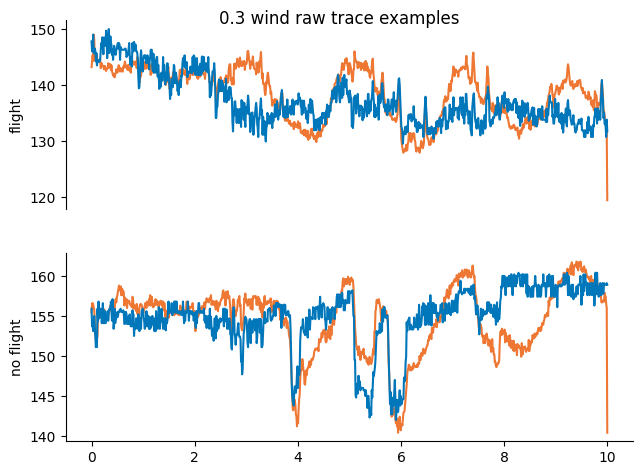

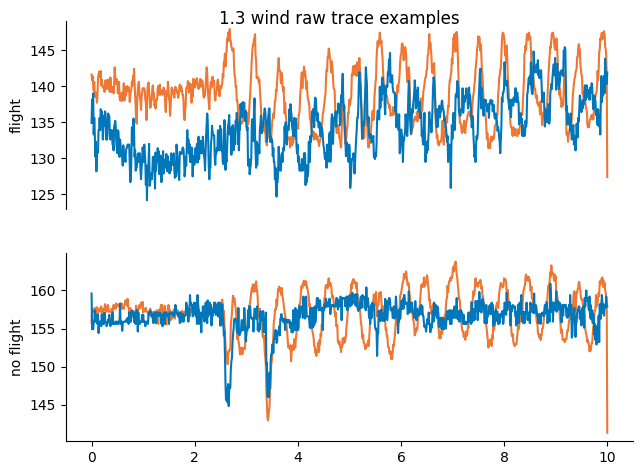

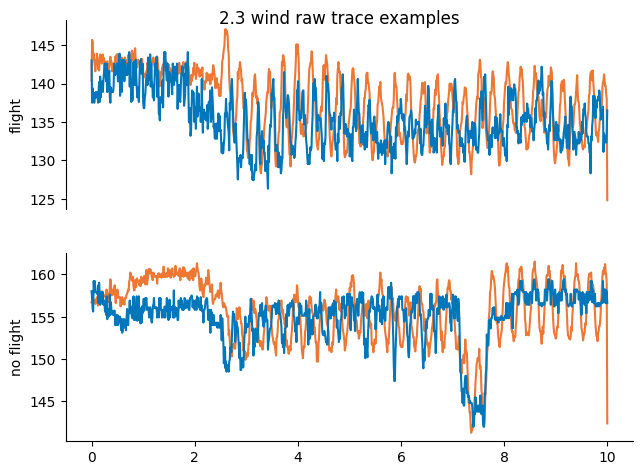

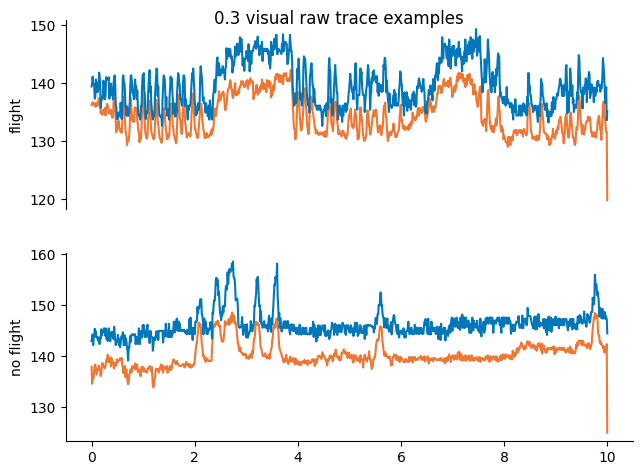

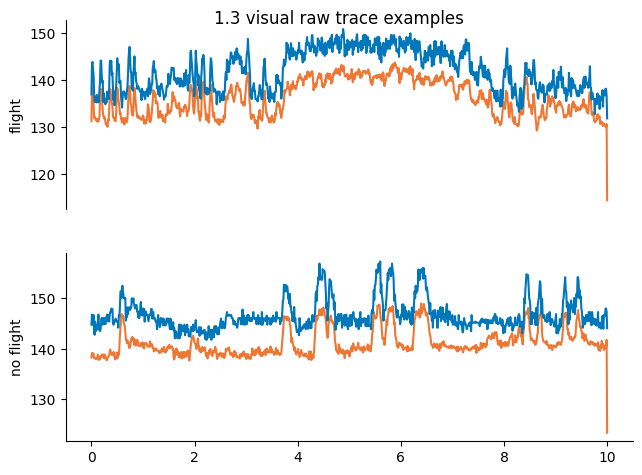

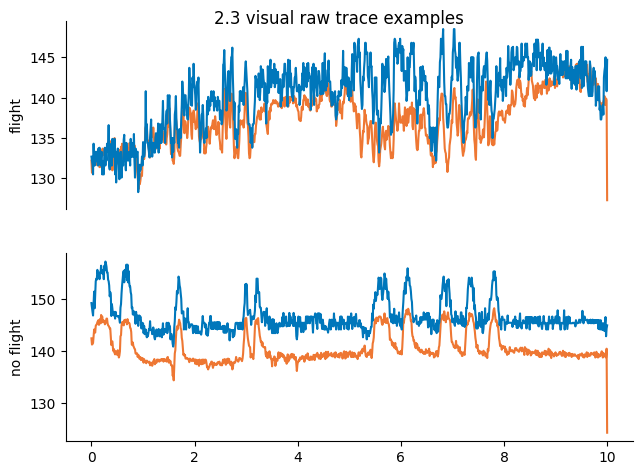

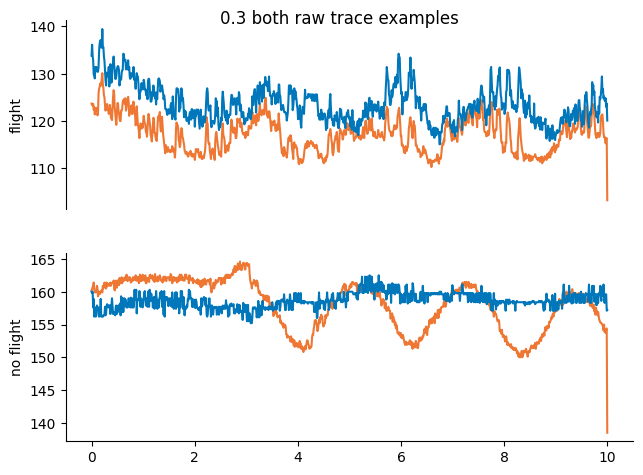

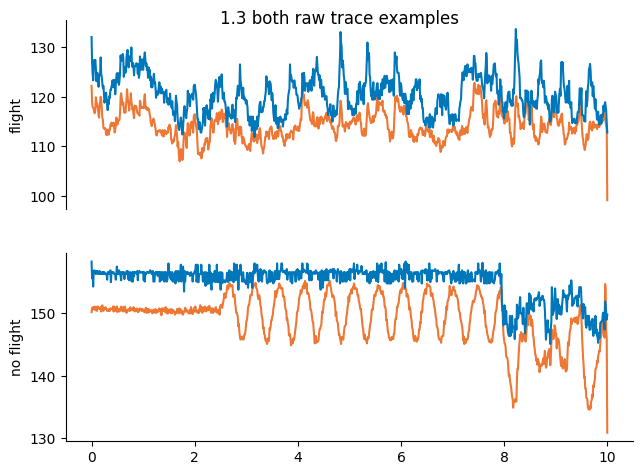

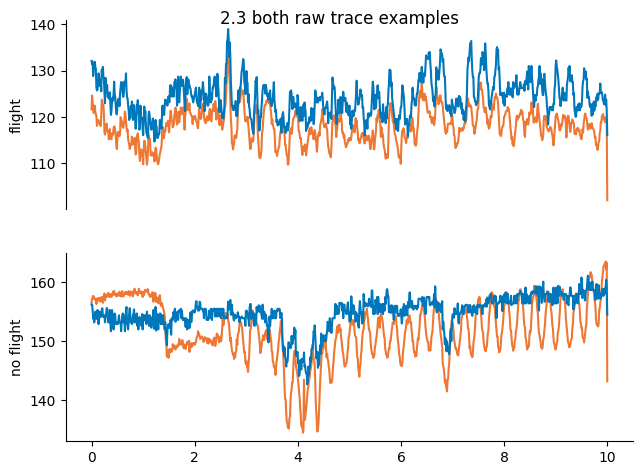

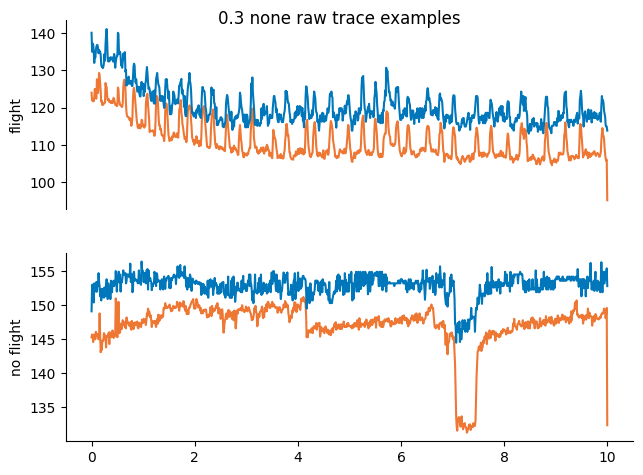

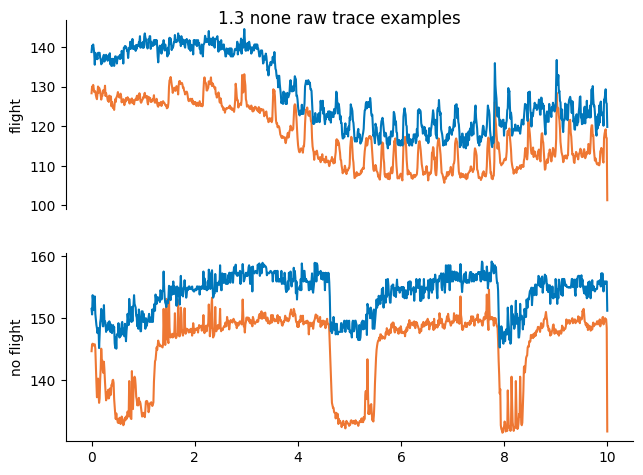

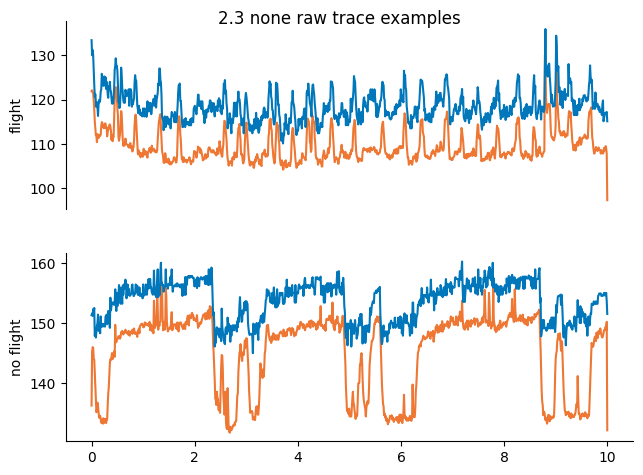

In [5]:
#RAW DATA PLOTS n=trial
freqs = [0.3, 1.3, 2.3]
conditions = ['wind','visual','both','none']
n = 0
for i, condition in enumerate(conditions):
    for freq in freqs:
        df_flight = df[(df['flight'] == True) & (df['stimulus'] == freq) & (df['condition'] == condition)].reset_index()
        df_noFlight = df[(df['noFlight'] == True) & (df['stimulus'] == freq) & (df['condition'] == condition)].reset_index()
        
        x = np.linspace(0,10,960)
        fig, axes = plt.subplots(2,1)
        fig.tight_layout()
        axes[0].plot(x,df_flight['iaa'][n][:,0],color=const.orange)
        axes[0].plot(x,df_flight['iaa'][n][:,1],color=const.blue)
        axes[1].plot(x,df_noFlight['iaa'][n][:,0],color=const.orange)
        axes[1].plot(x,df_noFlight['iaa'][n][:,1],color=const.blue)
        
        axes[0].spines[['right', 'top','bottom']].set_visible(False)
        axes[0].xaxis.set_visible(False)
        axes[0].set_ylabel('flight')
        axes[1].spines[['right', 'top']].set_visible(False)
        axes[1].set_ylabel('no flight')
        fig.suptitle(str(freq) + ' ' + condition + ' ' + 'raw trace examples')
        fig.savefig(str(freq)+'_'+condition+'.png',format='png', bbox_inches='tight')

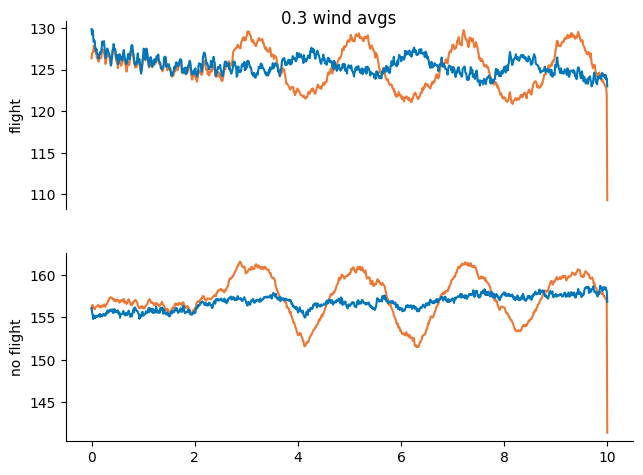

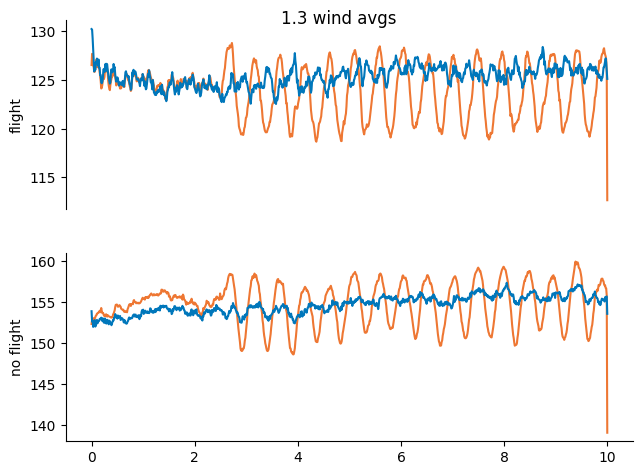

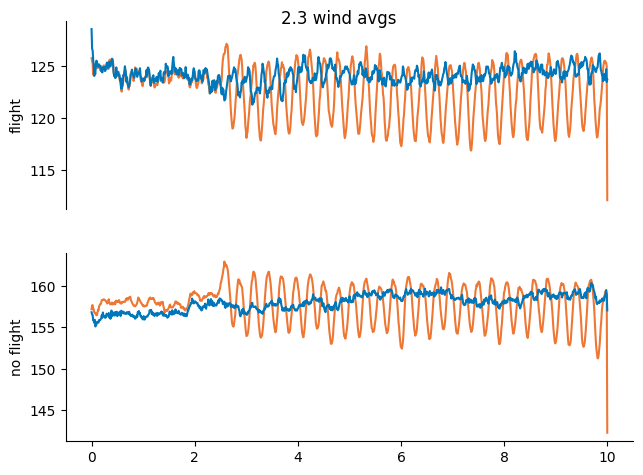

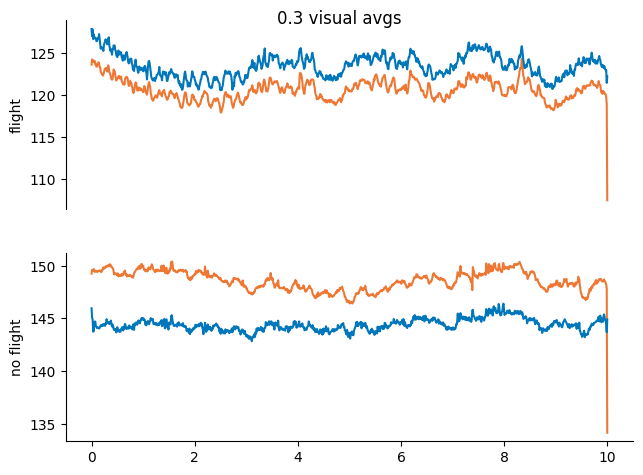

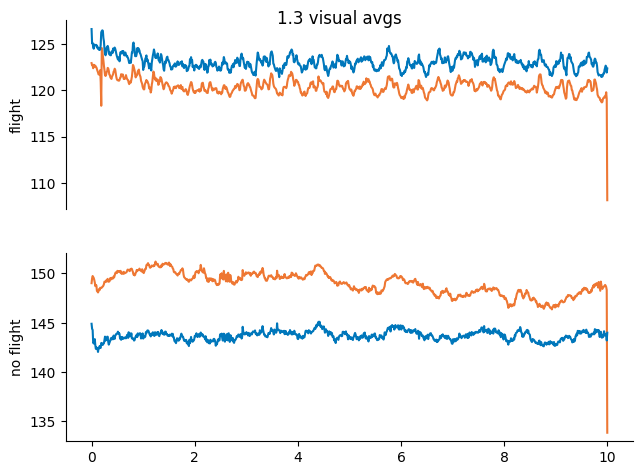

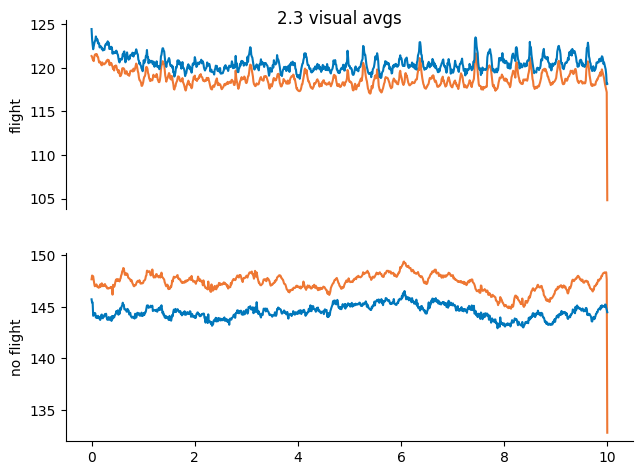

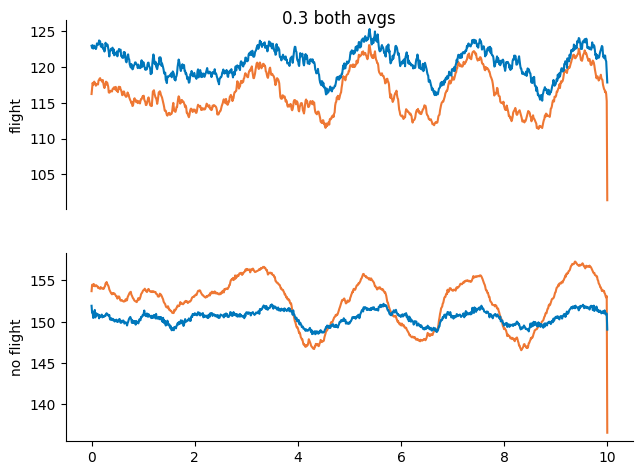

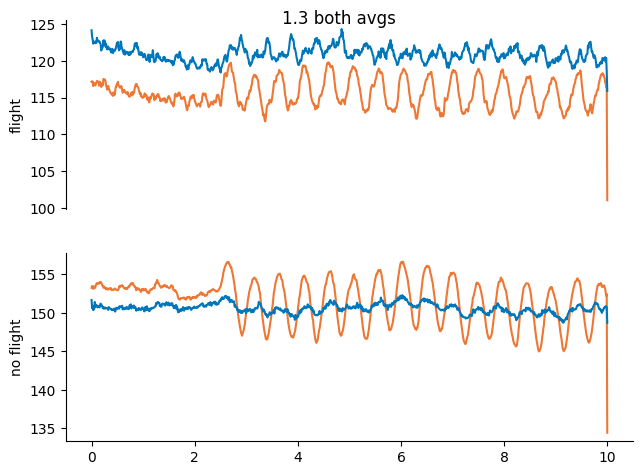

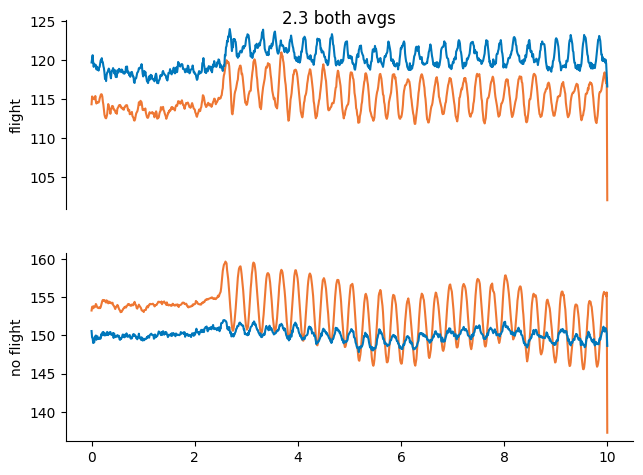

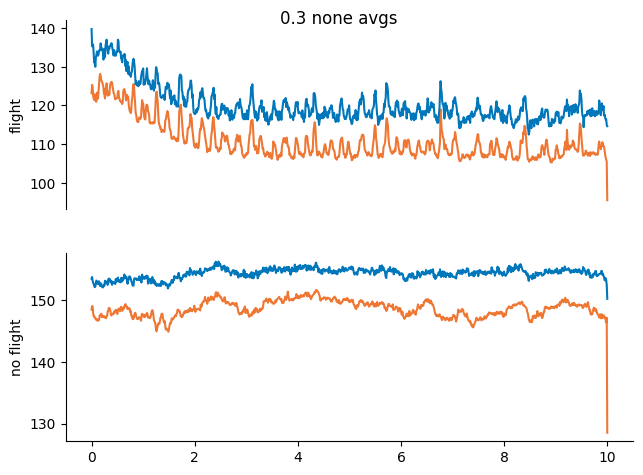

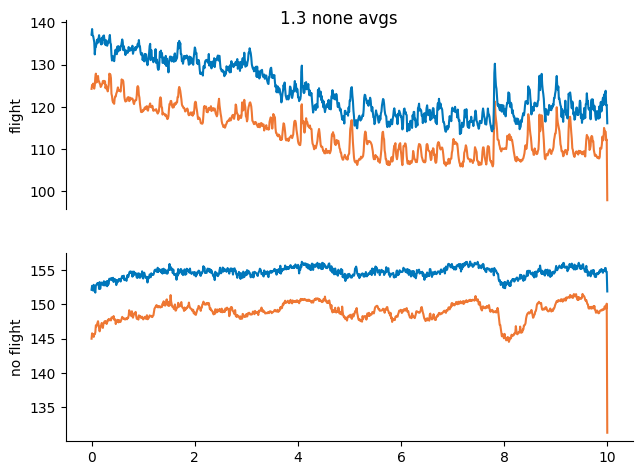

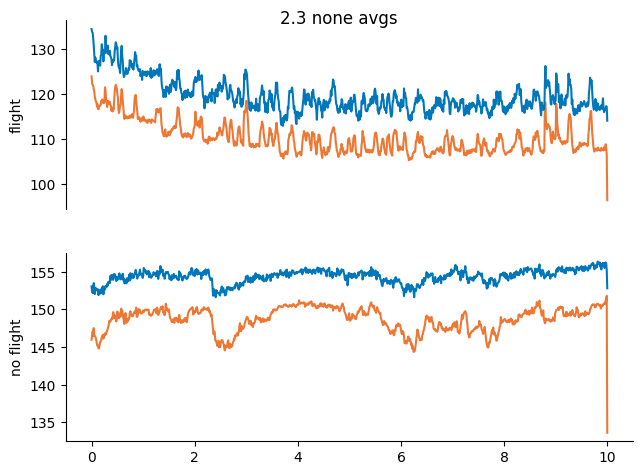

In [6]:
#AVG DATA PLOTS
freqs = [0.3,1.3, 2.3]
conditions = ['wind','visual','both','none']
#f_bounds = [[120,150],[85,130],[110,140]]
#nf_bounds = [[130,160],[115,150],[135,165]]
n = 0
for i,condition in enumerate(conditions):
    for freq in freqs:
        df_flight = df[(df['flight'] == True) & (df['stimulus'] == freq) & (df['condition'] == condition)].reset_index()
        df_noFlight = df[(df['noFlight'] == True) & (df['stimulus'] == freq) & (df['condition'] == condition)].reset_index()

        x = np.linspace(0,10,960)
        fig, axes = plt.subplots(2,1)
        fig.tight_layout()
        axes[0].plot(x,np.mean(np.array([trial[:,0] for trial in df_flight['iaa'].to_list()]),axis=0),color=const.orange)
        axes[0].plot(x,np.mean(np.array([trial[:,1] for trial in df_flight['iaa'].to_list()]),axis=0),color=const.blue)
        axes[1].plot(x,np.mean(np.array([trial[:,0] for trial in df_noFlight['iaa'].to_list()]),axis=0),color=const.orange)
        axes[1].plot(x,np.mean(np.array([trial[:,1] for trial in df_noFlight['iaa'].to_list()]),axis=0),color=const.blue)
        axes[0].spines[['right', 'top','bottom']].set_visible(False)
        axes[0].xaxis.set_visible(False)
        axes[0].set_ylabel('flight')
        #axes[0].set_ylim(f_bounds[i])
        axes[1].spines[['right', 'top']].set_visible(False)
        axes[1].set_ylabel('no flight')
        #axes[3].set_ylim(nf_bounds[i])
        fig.suptitle(str(freq) + ' ' + condition + ' ' + 'avgs')
        fig.savefig(str(freq)+'_'+condition+'_avgs'+'.png',format='png', bbox_inches='tight')

## Fig 6A and 6F

0.3
['wind n=113', 'visual n=79', 'both n=110']
['wind n=64', 'visual n=88', 'both n=65']
1.3
['wind n=110', 'visual n=83', 'both n=102']
['wind n=64', 'visual n=88', 'both n=74']
2.3
['wind n=104', 'visual n=96', 'both n=104']
['wind n=72', 'visual n=78', 'both n=75']


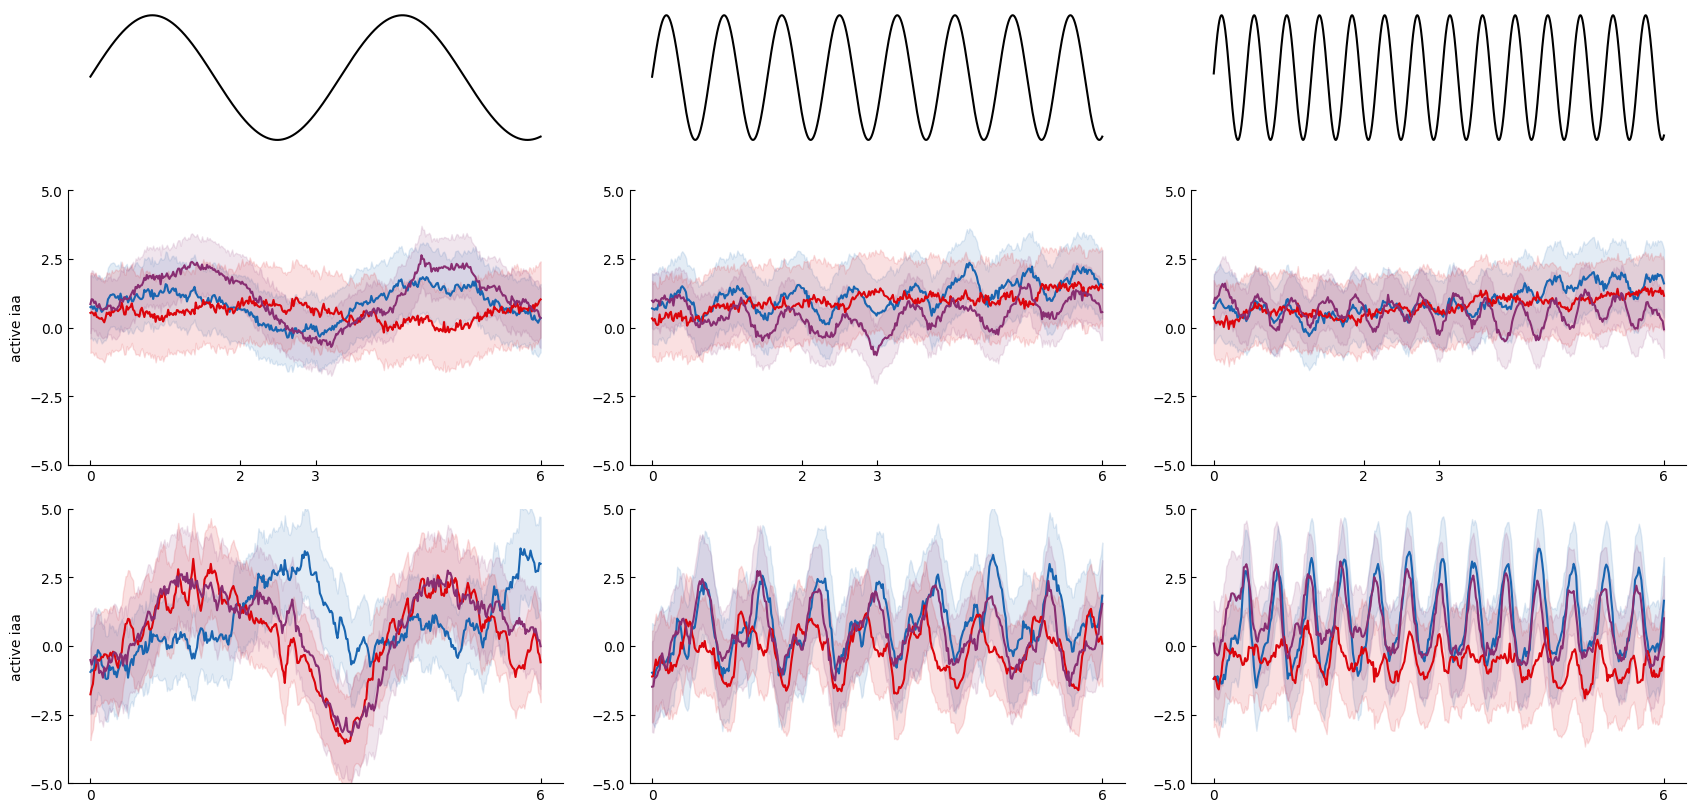

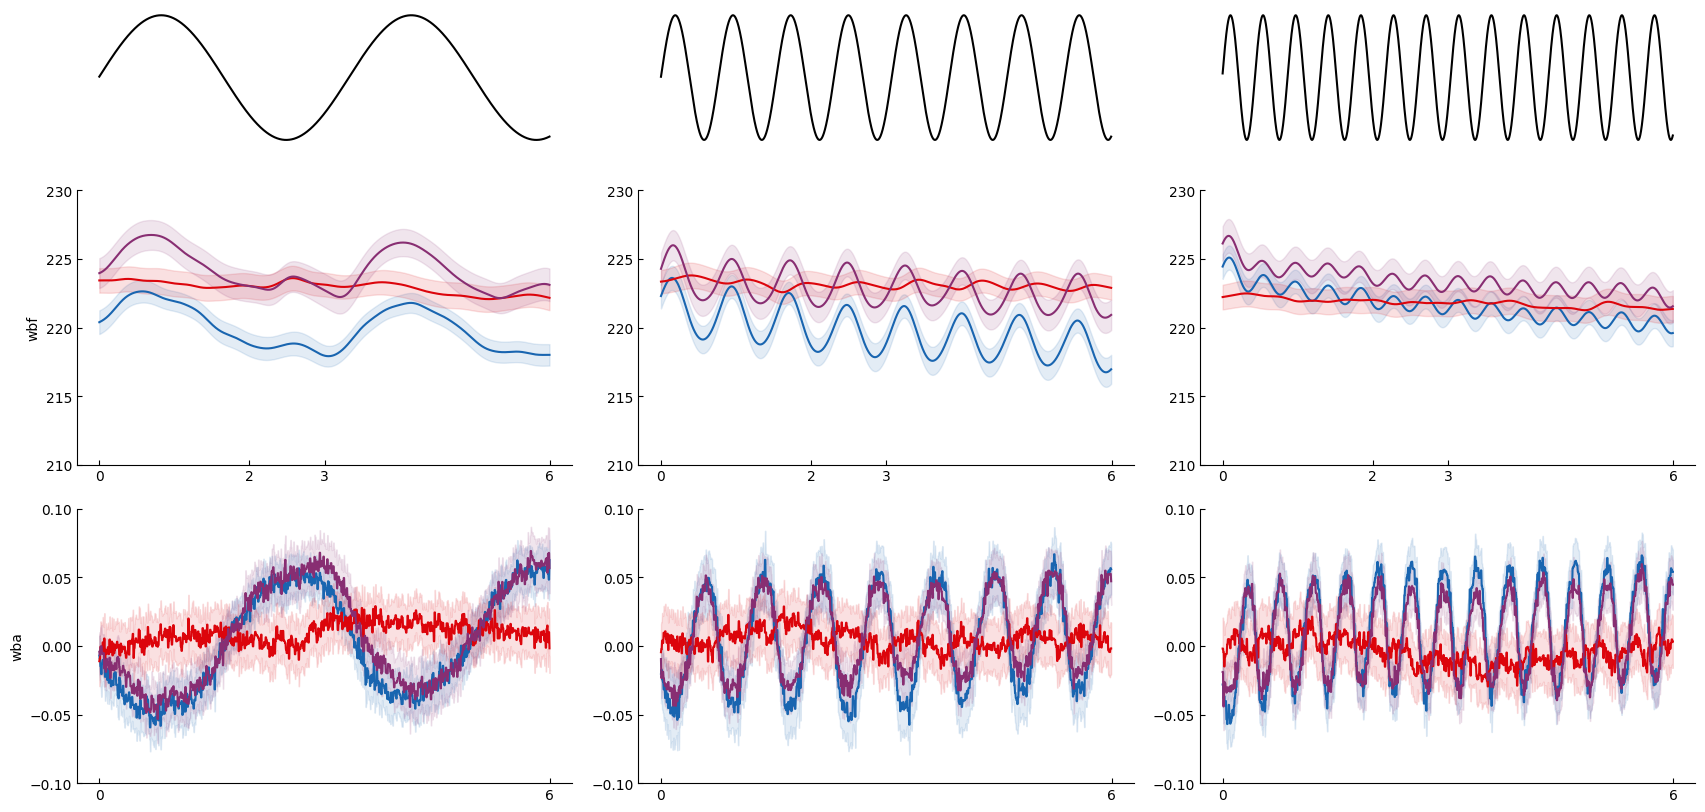

In [36]:
#2nd seg plots
freqs = [0.3,1.3, 2.3]
purp9 = np.array([136,46,114])/255
blue10 = np.array([25,101,176])/255
red26 = np.array([220,5,12])/255
palette = [blue10,red26,purp9]
data = {}
spio.loadmat('visualShiftInfo',mdict=data)
freq_list = np.squeeze(data['freq'])
phases = np.squeeze(data['phaseLagInRads'])
freq_list = np.array([freq_list[2], freq_list[6], freq_list[9]])
phases = np.array([phases[2], phases[6],phases[9]])
conditions = ['wind','visual','both']
sampshift = np.floor(const.fs * (phases/(2*np.pi*freq_list))).astype(np.int64)
frameshift = np.floor(const.fps * (phases/(2*np.pi*freq_list))).astype(np.int64)
sampshift = np.floor(frameshift * (20000/60)).astype(np.int64)
readjusted_theta = (sampshift / const.fs) * (2*np.pi*freq_list)

cutoff = 6
time = np.arange(0, 12-cutoff, 1/const.fs)
start = const.fs*4
cutoff_frames = cutoff * const.fps
cutoff_daq = cutoff * const.fs

global_max_list = []
global_min_list = []
for j, freq in enumerate(freqs):
    orig_theta = phases[j]
    adj_theta = readjusted_theta[j]
    sinewave = np.sin(2 * np.pi * freq * time - (adj_theta-orig_theta))
    flightLegend = ['wind','visual','both']
    noFlightLegend = ['wind','visual','both']
    
    for i,condition in enumerate(conditions):
    
        df_flight = df[(df['flight'] == True) & (df['stimulus'] == freq) & (df['condition'] == condition)].reset_index()
        
        mean_trace = np.nanmean(np.array(df_flight['wba'].to_list()),axis=0)[start+sampshift[j]:]
        global_max_list.append(np.nanmax(mean_trace))
        global_min_list.append(np.nanmin(mean_trace))
global_max = np.nanmax(global_max_list)
global_min = np.nanmin(global_min_list)

conditions = ['wind','visual','both']
n = 0
#fig, axes = plt.subplots(3,1,gridspec_kw={'height_ratios': [10,4,10]})
fig1, axes1 = plt.subplots(3,3,figsize=(17,25/3),gridspec_kw={'height_ratios': [1,2,2]})
fig2, axes2 = plt.subplots(3,3,figsize=(17,25/3),gridspec_kw={'height_ratios': [1,2,2]})
#fig3, axes3 = plt.subplots(2,3,figsize=(15,4.2),gridspec_kw={'height_ratios': [2,4]})
#fig4, axes4 = plt.subplots(2,3,figsize=(15,4.2),gridspec_kw={'height_ratios': [2,4]})
fig1.tight_layout()
fig2.tight_layout()
for j, freq in enumerate(freqs):
    orig_theta = phases[j]
    adj_theta = readjusted_theta[j]
    sinewave = np.sin(2 * np.pi * freq * time - (adj_theta-orig_theta))
    flightLegend = ['wind','visual','both']
    noFlightLegend = ['wind','visual','both']
    
    for i,condition in enumerate(conditions):

        df_flight = df[(df['flight'] == True) & (df['stimulus'] == freq) & (df['condition'] == condition)].reset_index()
        #df_flight['wba_norm'] = [1 - ((trial - global_min)/(global_max-global_min)) for trial in df_flight['wba']]
        df_flight['wba_norm'] = [trial * -1 for trial in df_flight['wba']]
        
        
        df_noFlight = df[(df['noFlight'] == True) & (df['stimulus'] == freq) & (df['condition'] == condition)].reset_index()
        if condition == 'visual':
            delrow = df_noFlight[(df_noFlight['fly'] == 7) & (df_noFlight['trialnum'] == 27)].index # trial ignored due to bonking of rig
            df_noFlight = df_noFlight.drop(delrow)

        #print(length(df_noFlight['fly'].unique()))
            
        x = np.linspace(0,12-cutoff,(12-cutoff)*60)
        x2 = np.linspace(0,12-cutoff,(12-cutoff)*20000)
        flightBase_act = np.nanmean(np.array([trial for trial in df_flight['BaseAvg_Flight'].to_list()]),axis=0)[1]
        noFlightBase_act = np.nanmean(np.array([trial for trial in df_noFlight['BaseAvg_noFlight'].to_list()]),axis=0)[1]
        flightBase_act_wba = np.nanmean(np.array([np.nanmean(trial[0:80000]) for trial in df_flight['wba_norm'].to_list()]),axis=0)
        
        conCountFlight = len(np.array([trial[:,1] for trial in df_flight['iaa'].to_list()]))
        conCountNoFlight = len(np.array([trial[:,1] for trial in df_noFlight['iaa'].to_list()]))
        flightLegend[i] = flightLegend[i] + ' n=' + str(conCountFlight)
        noFlightLegend[i] = noFlightLegend[i] + ' n=' + str(conCountNoFlight)
        
        flight_act = np.nanmean(np.array([trial[:,1] for trial in df_flight['iaa'].to_list()]),axis=0)
        noFlight_act = np.nanmean(np.array([trial[:,1] for trial in df_noFlight['iaa'].to_list()]),axis=0)
        
        flight_act_rel = flight_act[240:-cutoff_frames] - flightBase_act
        flight_act_sem = stats.sem(np.array([trial[:,1] for trial in df_flight['iaa'].to_list()]))[240+frameshift[j]:-cutoff_frames+frameshift[j]]
        noFlight_act_rel = noFlight_act[240:-cutoff_frames] - noFlightBase_act
        noFlight_act_sem = stats.sem(np.array([trial[:,1] for trial in df_noFlight['iaa'].to_list()]))[240+frameshift[j]:-cutoff_frames+frameshift[j]]

        flight_act_wbf = np.nanmean(np.array(df_flight['wbf'].to_list()),axis=0)[start+sampshift[j]:-cutoff_daq+sampshift[j]]
        flight_act_wbf_sem = stats.sem(np.array(df_flight['wbf'].to_list()))[start+sampshift[j]:-cutoff_daq+sampshift[j]]

        flight_act_wba = np.nanmean(np.array(df_flight['wba_norm'].to_list()),axis=0)[start+sampshift[j]:-cutoff_daq+sampshift[j]]
        flight_act_rel_wba = flight_act_wba - flightBase_act_wba
        flight_act_wba_sem = stats.sem(np.array(df_flight['wba_norm'].to_list()))[start+sampshift[j]:-cutoff_daq+sampshift[j]]
        
        if i == 0:
            axes1[0,j].plot(sinewave,'k')
            axes1[0,j].spines[['left','right', 'top','bottom']].set_visible(False)
            axes1[0,j].xaxis.set_visible(False)
            axes1[0,j].yaxis.set_visible(False)

            axes2[0,j].plot(sinewave,'k')
            axes2[0,j].spines[['left','right', 'top','bottom']].set_visible(False)
            axes2[0,j].xaxis.set_visible(False)
            axes2[0,j].yaxis.set_visible(False)
            """
            axes3[0,j].plot(sinewave,'k')
            axes3[0,j].spines[['left','right', 'top','bottom']].set_visible(False)
            axes3[0,j].xaxis.set_visible(False)
            axes3[0,j].yaxis.set_visible(False)
            
            axes4[0,j].plot(sinewave,'k')
            axes4[0,j].spines[['left','right', 'top','bottom']].set_visible(False)
            axes4[0,j].xaxis.set_visible(False)
            axes4[0,j].yaxis.set_visible(False)
            """
        
        axes1[1,j].plot(x,noFlight_act_rel,color=palette[i])
        axes1[1,j].fill_between(x, noFlight_act_rel+noFlight_act_sem,noFlight_act_rel-noFlight_act_sem,alpha=0.12,color=palette[i])
        axes1[1,j].spines[['right', 'top']].set_visible(False)
        axes1[1,j].set_ylim([-5,5])
        axes1[1,j].set_yticks([-5,-2.5,0,2.5,5])
        axes1[1,j].set_xticks([0,2,3,6])
        axes1[1,j].tick_params(direction="in")
        
        axes1[2,j].plot(x,flight_act_rel,color=palette[i])
        axes1[2,j].fill_between(x, flight_act_rel+flight_act_sem,flight_act_rel-flight_act_sem,alpha=0.12,color=palette[i])
        axes1[2,j].spines[['right', 'top']].set_visible(False)
        axes1[2,j].set_ylim([-5,5])
        axes1[2,j].set_yticks([-5,-2.5,0,2.5,5])
        axes1[2,j].set_xticks([0,6])
        axes1[2,j].tick_params(direction="in")

        axes2[1,j].plot(x2[::100],flight_act_wbf[::100],color=palette[i])
        axes2[1,j].fill_between(x2[::100], flight_act_wbf[::100]+flight_act_wbf_sem[::100],flight_act_wbf[::100]-flight_act_wbf_sem[::100],alpha=0.12,color=palette[i])
        axes2[1,j].spines[['right', 'top']].set_visible(False)
        axes2[1,j].set_ylim([210,230])
        axes2[1,j].set_yticks([210,215,220,225,230])
        axes2[1,j].set_xticks([0,2,3,6])
        axes2[1,j].tick_params(direction="in")

        axes2[2,j].plot(x2[::100],flight_act_rel_wba[::100],color=palette[i])
        axes2[2,j].fill_between(x2[::100], flight_act_rel_wba[::100]+flight_act_wba_sem[::100],flight_act_rel_wba[::100]-flight_act_wba_sem[::100],alpha=0.12,color=palette[i])
        axes2[2,j].spines[['right', 'top']].set_visible(False)
        axes2[2,j].set_ylim([-0.1,0.1])
        axes2[2,j].set_yticks([-0.1,-0.05,0,0.05,0.1])
        axes2[2,j].set_xticks([0,6])
        axes2[2,j].tick_params(direction="in")
    print(freq)
    print(noFlightLegend)
    print(flightLegend)

axes1[1,0].set_ylabel('active iaa')
axes1[2,0].set_ylabel('active iaa')
axes2[1,0].set_ylabel('wbf')
axes2[2,0].set_ylabel('wba')
fig1.savefig('6A.png',format='png', bbox_inches='tight')
fig1.savefig('6A.pdf',format='pdf', bbox_inches='tight')
fig2.savefig('6F.png',format='png', bbox_inches='tight')
fig2.savefig('6F.pdf',format='pdf', bbox_inches='tight')

## Linear effect plots (prelim coco, do not touch)

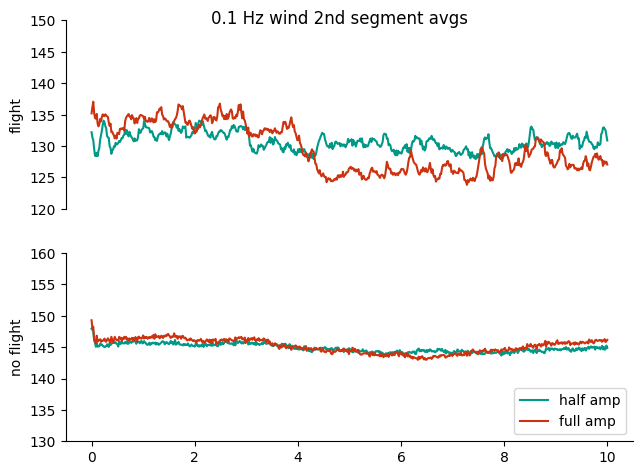

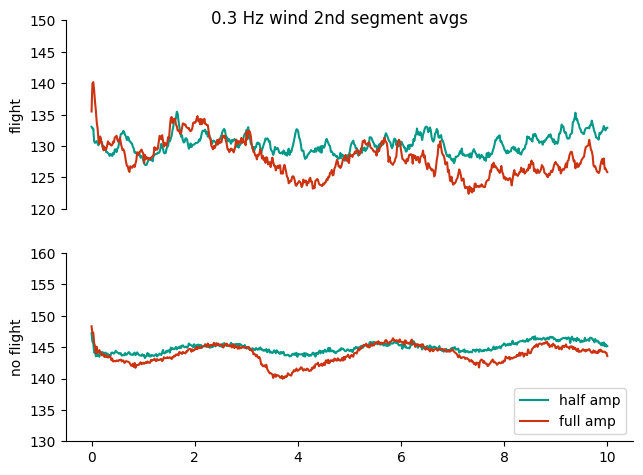

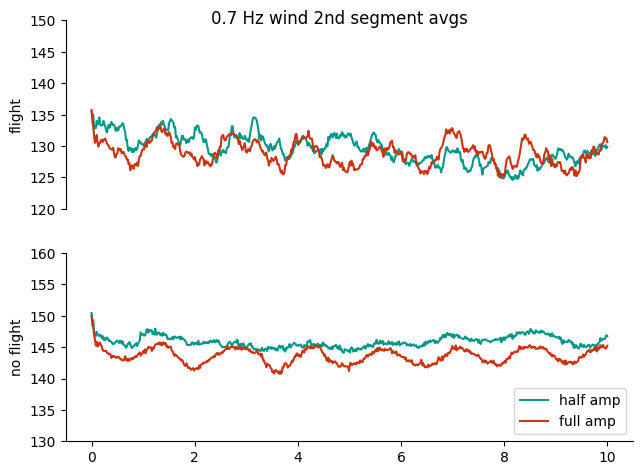

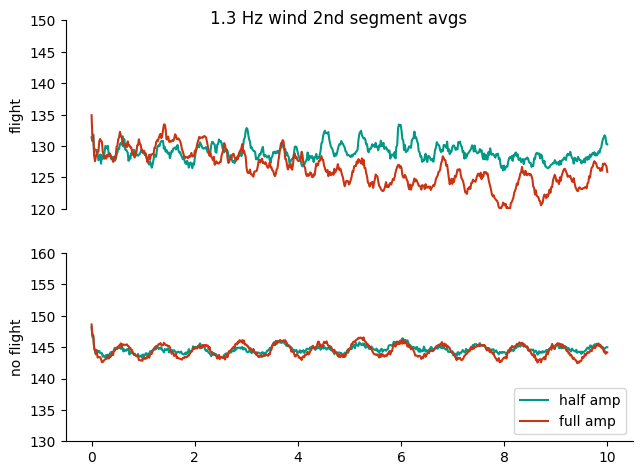

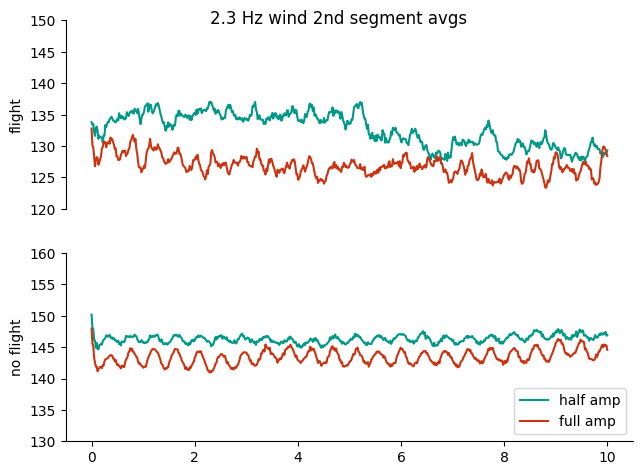

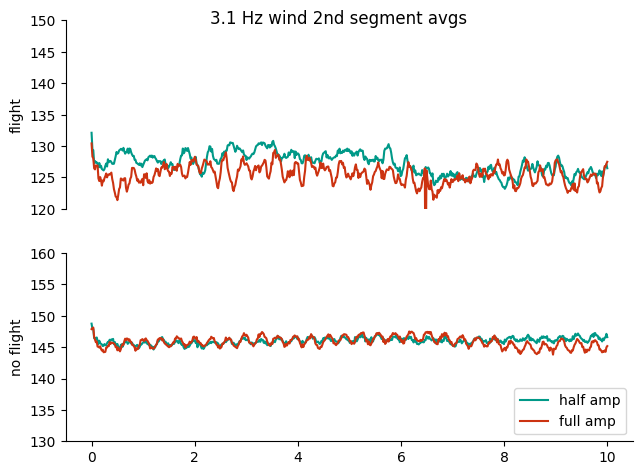

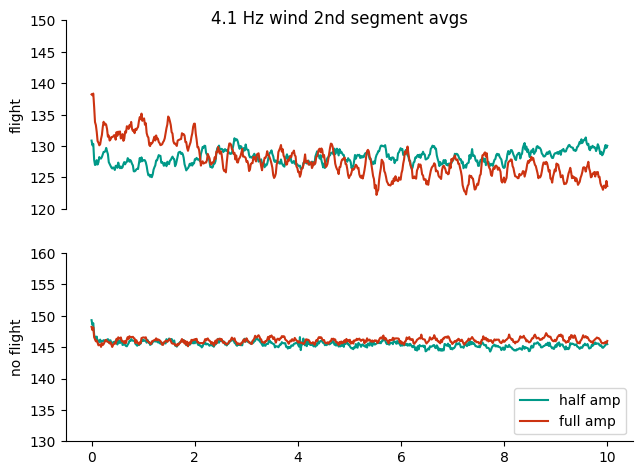

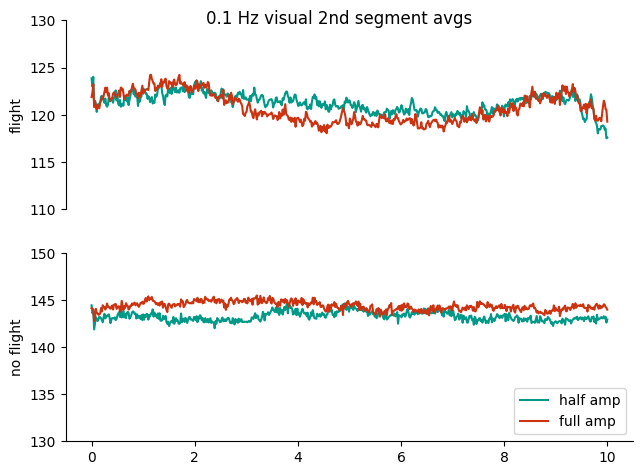

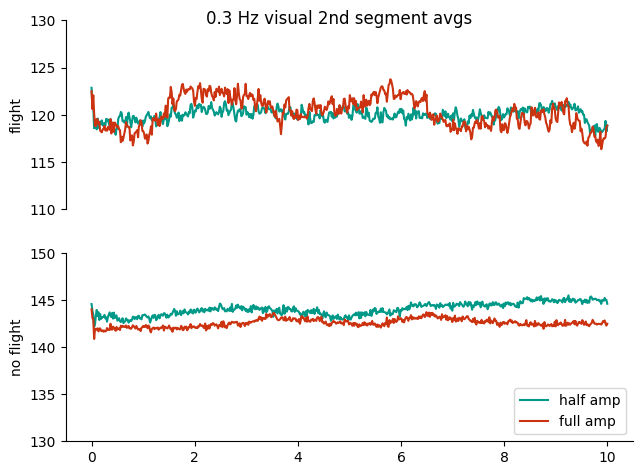

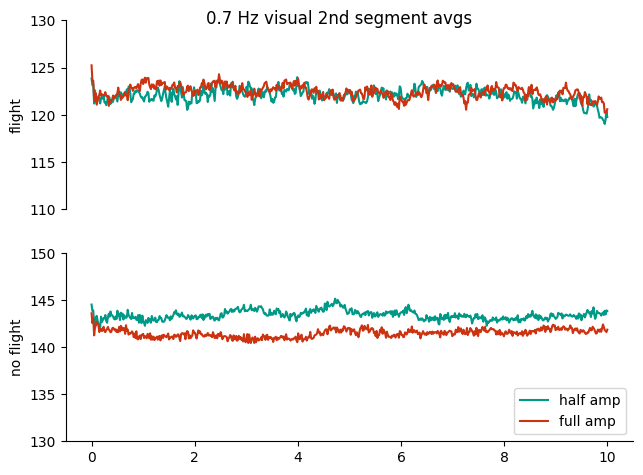

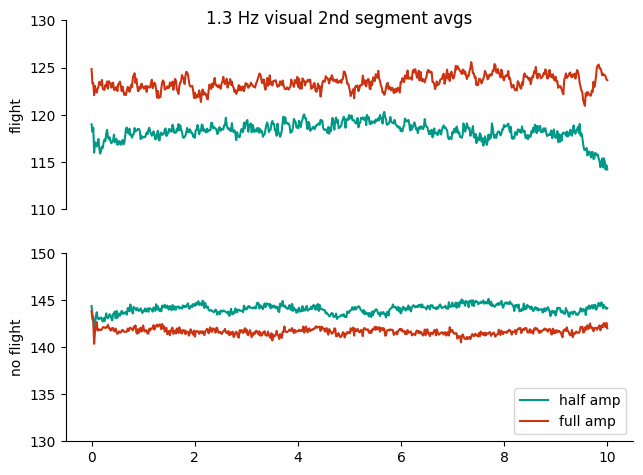

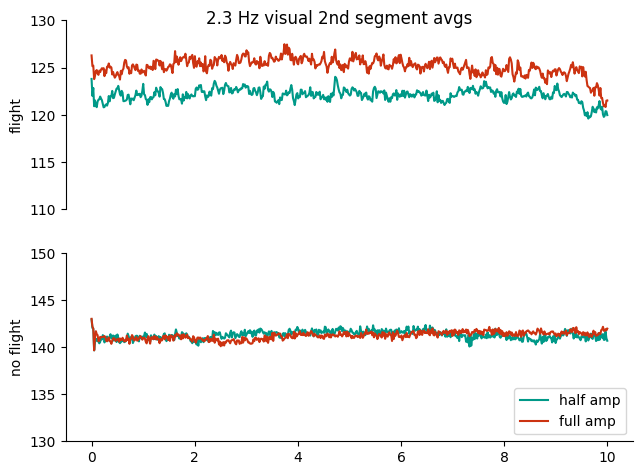

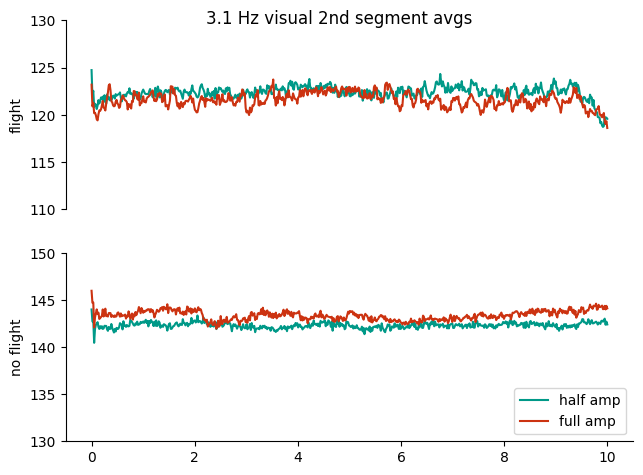

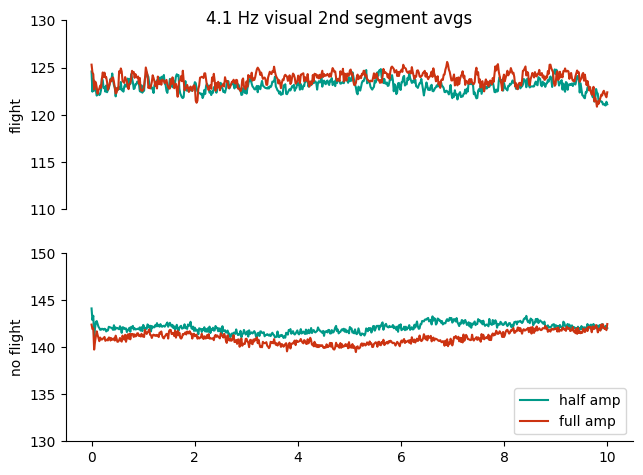

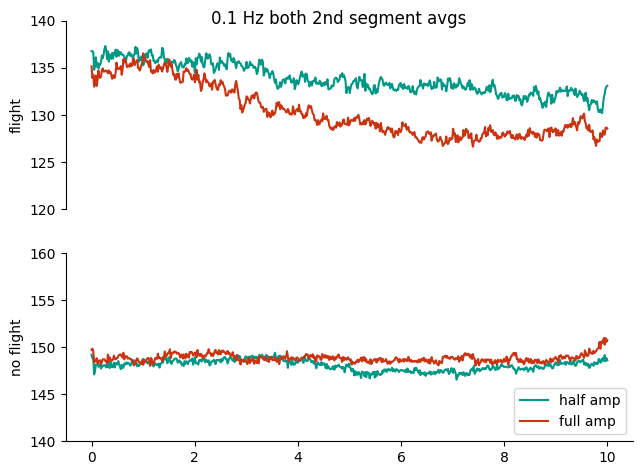

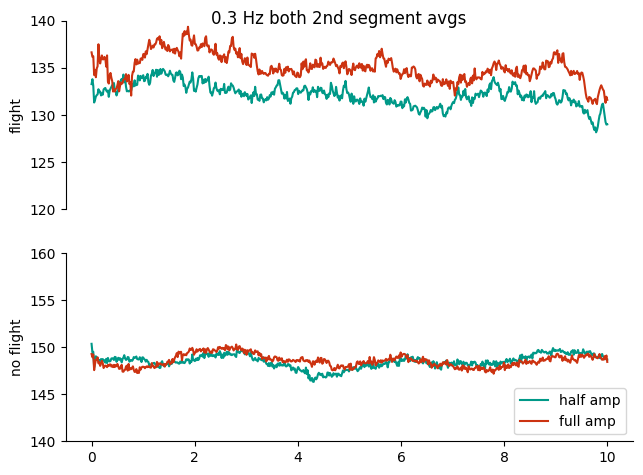

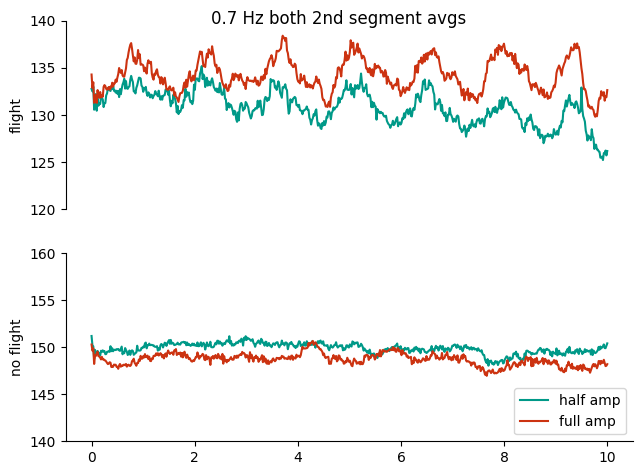

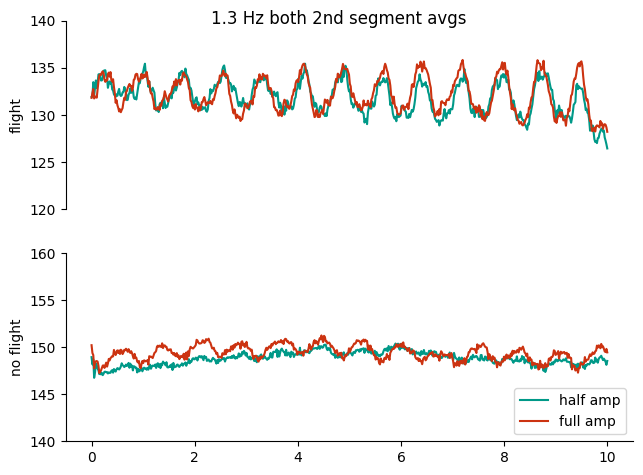

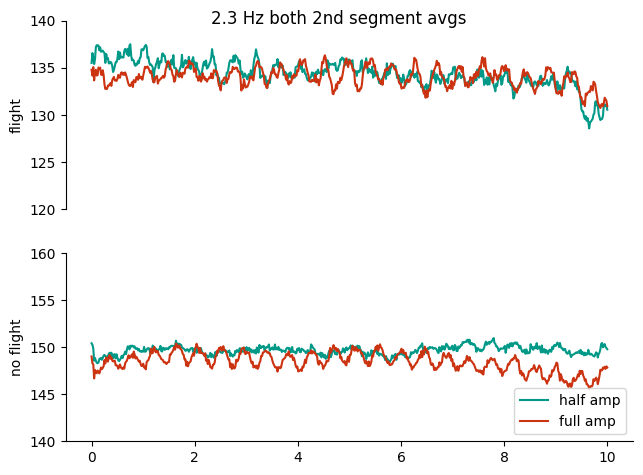

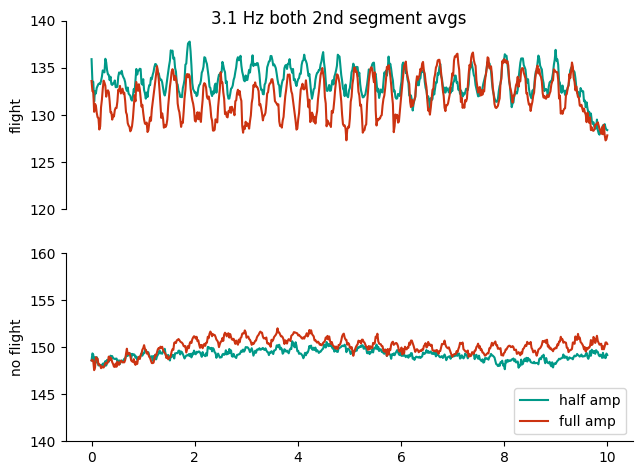

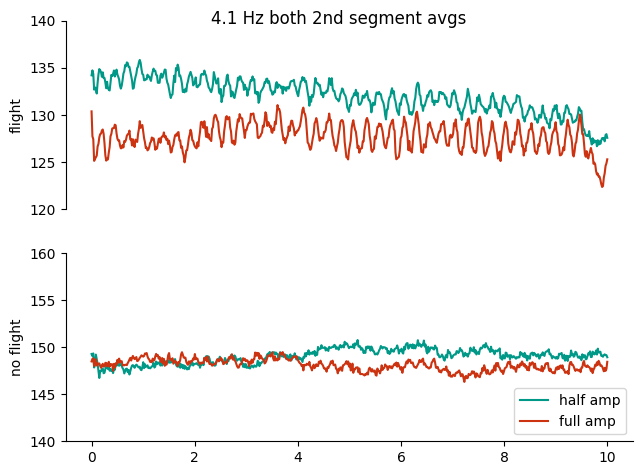

In [112]:
#LINEAR EFFECT PLOTS
freqs = [0.1, 0.3, 0.7, 1.3, 2.3, 3.1, 4.1]
conditions = ['wind','visual','both']
f_bounds = [[120,150],[110,130],[120,140]]
nf_bounds = [[130,160],[130,150],[140,160]]
for i,condition in enumerate(conditions):
    for freq in freqs:
        lowAmp_df_flight = df[(df['flight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 2) & (df['condition'] == condition)].reset_index()
        lowAmp_df_noFlight = df[(df['noFlight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 2) & (df['condition'] == condition)].reset_index()
        highAmp_df_flight = df[(df['flight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 1) & (df['condition'] == condition)].reset_index()
        highAmp_df_noFlight = df[(df['noFlight'] == True) & (df['stimulus'] == freq) & (df['ampCondition'] == 1) & (df['condition'] == condition)].reset_index()

        x = np.linspace(0,10,600)
        fig, axes = plt.subplots(2,1)
        fig.tight_layout()
        axes[0].plot(x,np.mean(np.array([trial[:,1] for trial in lowAmp_df_flight['iaa'].to_list()]),axis=0),color=const.teal)
        axes[0].plot(x,np.mean(np.array([trial[:,1] for trial in highAmp_df_flight['iaa'].to_list()]),axis=0),color=const.red)
        axes[1].plot(x,np.mean(np.array([trial[:,1] for trial in lowAmp_df_noFlight['iaa'].to_list()]),axis=0),color=const.teal)
        axes[1].plot(x,np.mean(np.array([trial[:,1] for trial in highAmp_df_noFlight['iaa'].to_list()]),axis=0),color=const.red)
        axes[0].spines[['right', 'top','bottom']].set_visible(False)
        axes[0].xaxis.set_visible(False)
        axes[0].set_ylabel('flight')
        axes[0].set_ylim(f_bounds[i])
        
        axes[1].spines[['right', 'top']].set_visible(False)
        axes[1].set_ylabel('no flight')
        axes[1].set_ylim(nf_bounds[i])
        axes[1].legend(['half amp','full amp'],loc='lower right')
        fig.suptitle(str(freq) + ' Hz ' + condition + ' 2nd segment avgs')
        fig.savefig(str(freq)+'_'+condition+'_2nd_seg_avgs'+'.png',format='png', bbox_inches='tight')

## Fig 6B & 6C

113
Condition: wind Freq: 0.3 Gain: 0.9798887300553883 , phase shift: -0.3607931832559298
[[[0.12723673 0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.22775005 0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]]
80
Condition: visual Freq: 0.3 Gain: 0.15689306172067255 , phase shift: -1.917405601898322
[[[0.12723673 0.08245829 0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.22775005 0.22401863 0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]]
110
Condition: both Freq: 0.3 Gain: 1.3533115592639307 , phase shift: -0.7154001409913076
[[[0.12723673 0.08245829 0.17132866]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.22775005 0.22401863 0.18149085]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]]
110
Condition: wind Freq: 1.3 Gain: 0.5946168696931

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


wind
--------------------
gain 95% ci across frequencies:
[[0.12723673 0.12440337 0.09493677]
 [0.22775005 0.1144646  0.12143747]]
phase shift (deg) 95% ci across frequencies:
[[ 7.82798787 68.23583379  6.45166544]
 [ 7.6219156  86.84073804  7.63381611]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


visual
--------------------
gain 95% ci across frequencies:
[[0.08245829 0.0376925  0.02237722]
 [0.22401863 0.05285349 0.05025808]]
phase shift (deg) 95% ci across frequencies:
[[ 6.53265485 54.94520331  7.44940604]
 [ 4.60443171 62.7605946   8.79849319]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


both
--------------------
gain 95% ci across frequencies:
[[0.17132866 0.12156391 0.10417981]
 [0.18149085 0.12908632 0.08971778]]
phase shift (deg) 95% ci across frequencies:
[[11.37900541 98.73741304  4.3933971 ]
 [ 7.94610462 82.10814774  5.28893691]]


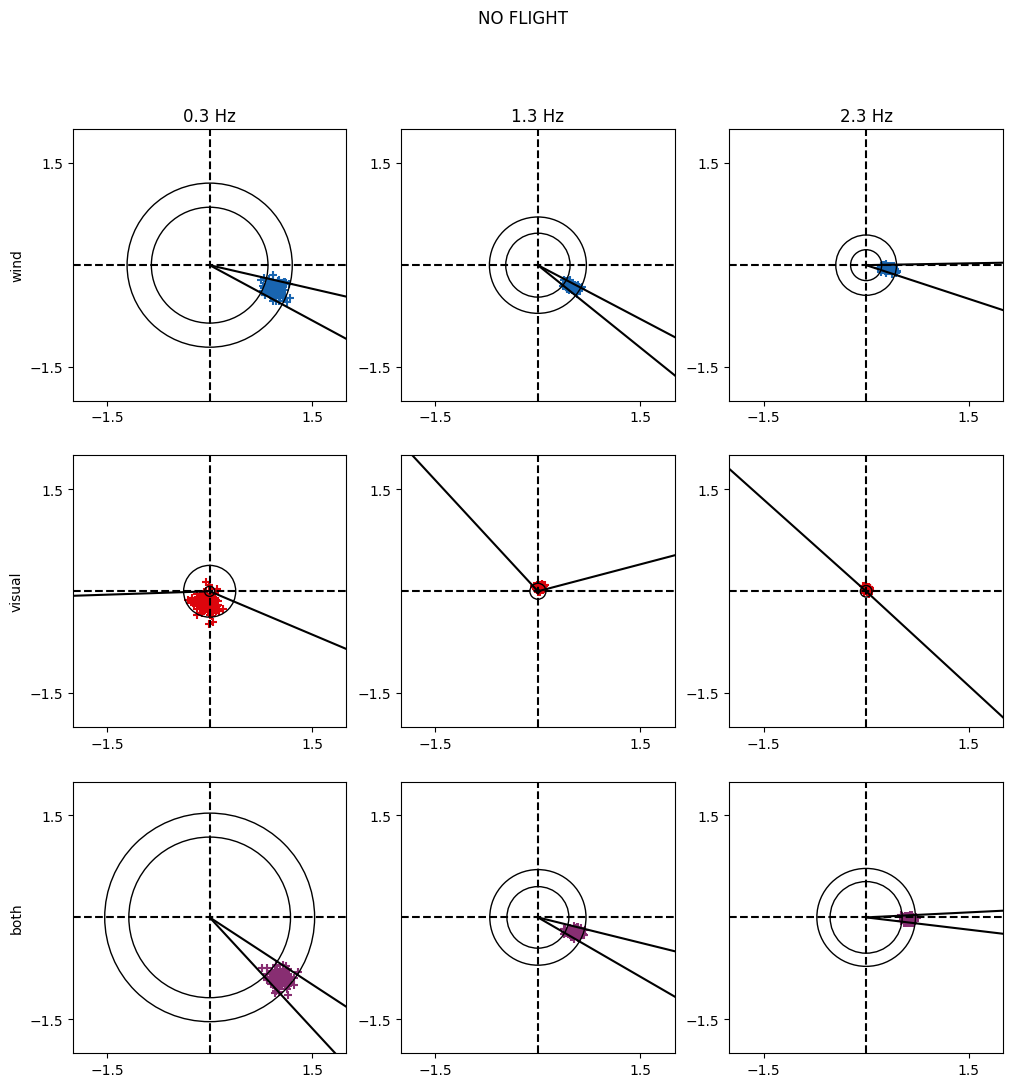

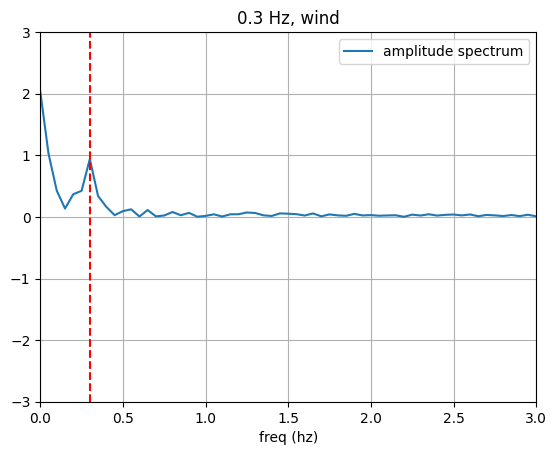

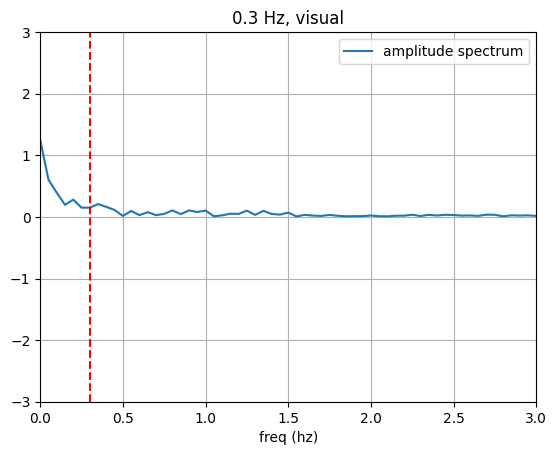

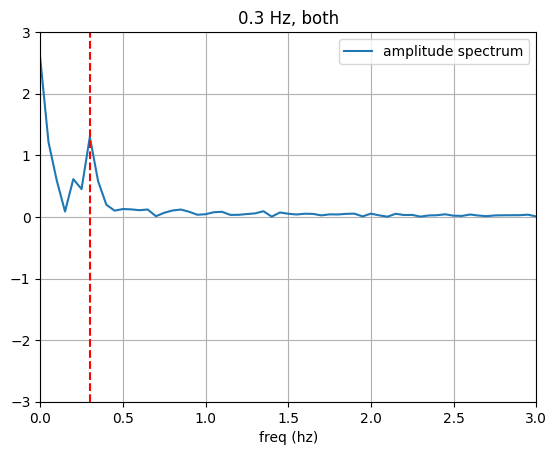

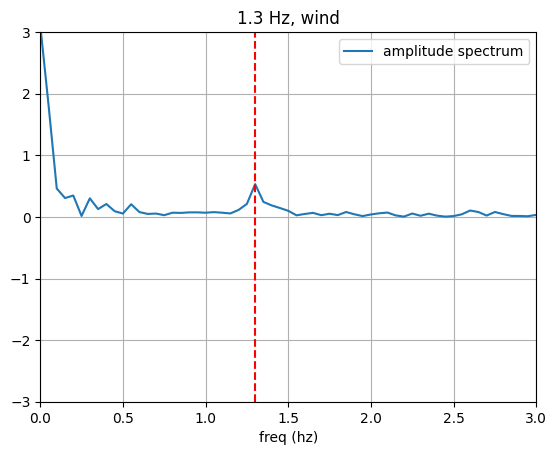

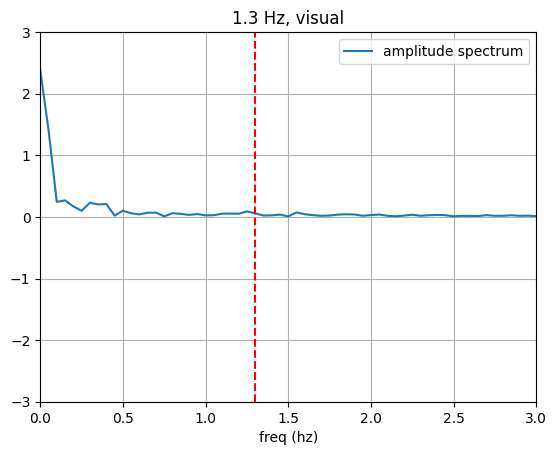

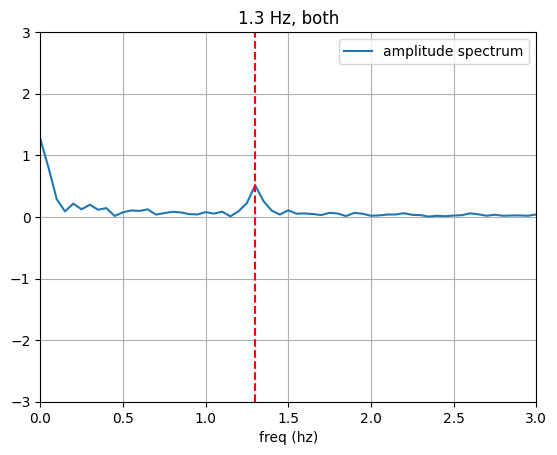

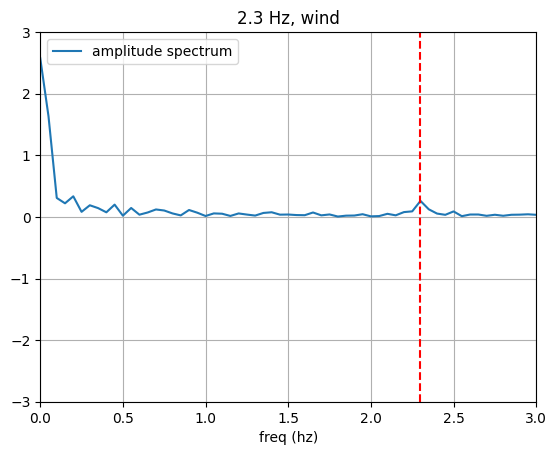

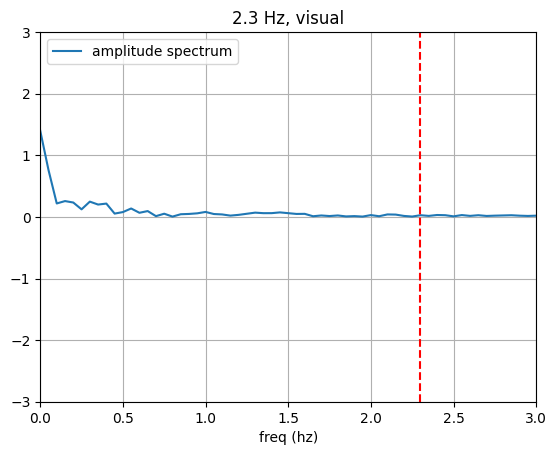

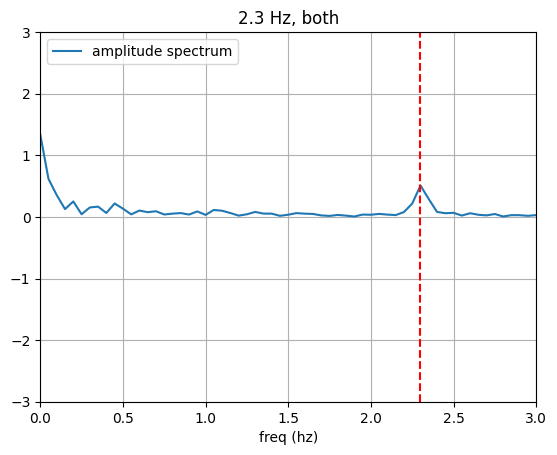

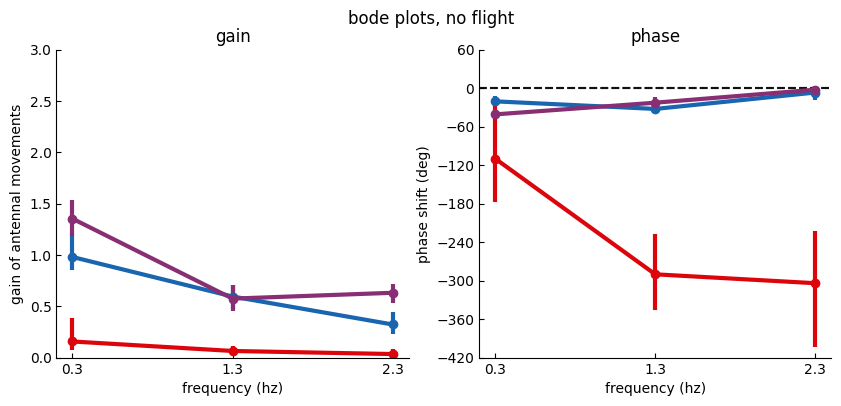

In [62]:
# NO FLIGHT
Fs = 20000

freqs = [0.3,1.3, 2.3]

freqs = [0.3,1.3, 2.3]
purp9 = np.array([136,46,114])/255
blue10 = np.array([25,101,176])/255
red26 = np.array([220,5,12])/255
palette = [blue10,red26,purp9]

data = {}
spio.loadmat('visualShiftInfo',mdict=data)
freq_list = np.squeeze(data['freq'])
phases = np.squeeze(data['phaseLagInRads'])
freq_list = np.array([freq_list[2], freq_list[6], freq_list[9]])
phases = np.array([phases[2], phases[6],phases[9]])
time = np.arange(0, 12, 1/20000)

frameshift = np.floor(const.fps * (phases/(2*np.pi*freq_list))).astype(np.int64)
sampshift = np.floor(frameshift * (20000/60)).astype(np.int64)
readjusted_theta = (sampshift / const.fs) * (2*np.pi*freq_list)

conditions = ['wind','visual','both']
#f_bounds = [[120,150],[85,130],[110,140]]
#nf_bounds = [[130,160],[115,150],[135,165]]
n = 0
phaseShiftArr = np.zeros((3,3))
phaseShiftArr_ci = np.zeros((2,3,3))
gainArr = np.zeros((3,3))
gainArr_ci = np.zeros((2,3,3))
rng = np.random.default_rng()
num_mc_reps = 100

fig_scatter, ax_scatter = plt.subplots(3,3, figsize=(12,12))
#fig_scatter.tight_layout()
fig_scatter.suptitle('NO FLIGHT')
ax_scatter[0,0].set_title('0.3 Hz')
ax_scatter[0,1].set_title('1.3 Hz')
ax_scatter[0,2].set_title('2.3 Hz')
ax_scatter[0,0].set_ylabel('wind')
ax_scatter[1,0].set_ylabel('visual')
ax_scatter[2,0].set_ylabel('both')


for i, f in enumerate(freqs):
    orig_theta = phases[i]
    adj_theta = readjusted_theta[i]
    #sinewave = np.sin(2 * np.pi * freq * time - theta)
    flightLegend = ['wind','visual','both']
    noFlightLegend = ['wind','visual','both']
    shift = frameshift[i]
    for k,condition in enumerate(conditions):

        df_flight = df[(df['flight'] == True) & (df['stimulus'] == f) & (df['condition'] == condition)].reset_index()
        df_noFlight = df[(df['noFlight'] == True) & (df['stimulus'] == f) & (df['condition'] == condition)].reset_index()
        
        flightBase_arr = np.array([trial for trial in df_flight['BaseAvg_Flight'].to_list()])
        flightBase = np.nanmean(flightBase_arr,axis=0)[1]
        
        noFlightBase_arr = np.array([trial for trial in df_noFlight['BaseAvg_noFlight'].to_list()])
        noFlightBase = np.nanmean(noFlightBase_arr,axis=0)[1]

        conCountFlight = len(np.array([trial[:,1] for trial in df_flight['iaa'].to_list()]))
        flight = np.nanmean(np.array([trial[:,1] for trial in df_flight['iaa'].to_list()]),axis=0)
        conCountNoFlight = len(np.array([trial[:,1] for trial in df_noFlight['iaa'].to_list()]))

        noFlight_arr = np.array([trial[:,1] for trial in df_noFlight['iaa'].to_list()])
        noFlight = np.nanmean(noFlight_arr,axis=0)

        flightWave = flight[240+shift:] - flightBase
        noFlightWave = noFlight[240+shift:] - noFlightBase

        
        
        # Sample information
        samprate = 60
        N = samprate * 12
        T = 1.0 / samprate
        # Create a signal
        x = np.linspace(0.0, N*T, N-shift)
        pad = np.zeros((480+shift,1))
        
        # sinewave (stimulus)
        
        sinewave = np.sin(2 * np.pi * f * x - (adj_theta-orig_theta))
        waveInput = np.append(sinewave,pad)
        yInput = np.fft.fft(waveInput)[:N//2]
        freqInput = np.fft.fftfreq(waveInput.size, d=T)[:N//2]
        indexInput, = np.where(np.isclose(freqInput, f, atol=10e-10))
    
        ### main trace 
        
        signalNoFlight = np.append(noFlightWave,pad)
        ySig = np.fft.fft(signalNoFlight)[:N//2]
        freqSig = np.fft.fftfreq(signalNoFlight.size, d=T)[:N//2]
        indexSig, = np.where(np.isclose(freqSig, f, atol=10e-10))

        H = ySig[indexSig[0]] / yInput[indexSig[0]]
        gain = np.abs(H)  # Gain is the magnitude
        phase = np.angle(H)  # Phase in radians
        if phase > 0:
            phase_adj = phase - (2 * np.pi)
        else:
            phase_adj = phase
            
        # Get magnitude and phase


        
        ### error bars
        
        num_mc_samps = df_noFlight['index'].count()
        print(num_mc_samps)
        montecarlo = rng.integers(low=0,high=num_mc_samps,size=(num_mc_reps,num_mc_samps))

        mc_altered_traces = [np.nanmean(np.array([noFlight_arr[col,:] for col in row]),axis=0) for row in montecarlo]
        corr_mc_altered_traces = [trace[240+shift:] - np.nanmean(trace[0:240]) for trace in mc_altered_traces]
        
        padded_mc_altered_traces = [np.append(trace,pad) for trace in corr_mc_altered_traces]
        ySigs = [np.fft.fft(trace)[:N//2] for trace in padded_mc_altered_traces]
        freqSigs = [np.fft.fftfreq(trace.size, d=T)[:N//2] for trace in padded_mc_altered_traces]
        
        H_all = [ySig[indexSig[0]] / yInput[indexSig[0]] for ySig in ySigs]
        real = [number.real for number in H_all]
        imag = [number.imag for number in H_all]
        
        ax_scatter[k,i].scatter(real, imag, color=palette[k], marker ='+')
        ax_scatter[k,i].axvline(0, c='k',ls='--')
        ax_scatter[k,i].axhline(0, c='k',ls='--')
        ax_scatter[k,i].set_ylim([-2,2])
        ax_scatter[k,i].set_yticks([-1.5,1.5])
        ax_scatter[k,i].set_xticks([-1.5,1.5])
        ax_scatter[k,i].set_xlim([-2,2])

        gain_mc = np.array([np.abs(H) for H in H_all])
        gain_lower = np.percentile(gain_mc, 2.5)
        gain_upper = np.percentile(gain_mc, 97.5)
        
        phase_mc = np.array([np.angle(H) for H in H_all])
        wrapped = (phase_mc + 2 * np.pi) % (2 * np.pi)
        wrapped.sort()

        central_fraction = 0.95
        
        ndx = len(wrapped)

        min_width = 2 * np.pi
        min_start = 0
        for idx in range(num_mc_reps):
            jdx = (idx + 95) % num_mc_reps
            width = (wrapped[jdx] - wrapped[idx]) % (2 * np.pi)
            if width < min_width:
                min_width = width
                min_start = idx

        lower = wrapped[min_start]
        upper = (lower + min_width) % (2 * np.pi)
        
        lower_plot = 10 * np.exp(1j * np.array(lower))
        upper_plot = 10 * np.exp(1j * np.array(upper))

        ax_scatter[k,i].plot([0, lower_plot.real] ,[0,lower_plot.imag],c='k')
        ax_scatter[k,i].plot([0, upper_plot.real] ,[0,upper_plot.imag],c='k')

        
        lower_circle = plt.Circle((0, 0j), gain_lower, fill=False, color='k')
        ax_scatter[k,i].add_artist(lower_circle)
        upper_circle = plt.Circle((0, 0j), gain_upper, fill=False, color='k')
        ax_scatter[k,i].add_artist(upper_circle)
        
        rel_lower = (phase - lower + np.pi) % (2 * np.pi) - np.pi
        rel_upper = (upper - phase + np.pi) % (2 * np.pi) - np.pi
        phase_range = [rel_lower,rel_upper]

        print("Condition:", condition, "Freq:", f,"Gain:", gain, ", phase shift:", phase)

        phaseShiftArr[i,k] = np.rad2deg(phase_adj)
        phaseShiftArr_ci[:,i,k] = np.rad2deg(phase_range)
        gainArr[i,k] = gain
        gainArr_ci[:,i,k] = [gain - gain_lower, gain_upper - gain]

        print(gainArr_ci)
        
        # Plot a spectrum
        fig,ax = plt.subplots()
        ax.plot(freqSig, (2/N) * np.abs(ySig), label='amplitude spectrum')   # in a conventional form
        #ax.plot(freqInput[0:N//2], np.angle(yInput[0:N//2]), label='phase spectrum')
        ax.axvline(freqSig[indexSig[0]],ls='--',c='r')
        ax.legend()
        ax.set_xlim([0,3])
        ax.set_ylim([-3,3])
        ax.grid()
        ax.set_xlabel('freq (hz)')
        ax.set_title(str(f)+' Hz, '+condition)
        fig.savefig(str(f)+'_'+condition+'_fft.png')

fig_scatter.savefig('noFlight_scatter.png')

conditionList = ['wind','visual','both']
flightLegend = ['wind','_','visual','_','both']
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
freqs = [0.3,1.3,2.3]
for k in range(3):
    ax1.errorbar(freqs,gainArr[:,k],yerr=gainArr_ci[:,:,k],fmt='-o',linewidth=3,color=palette[k])
    ax1.set_title('gain')
    ax1.set_ylim([0,3])
    ax1.set_xticks([0.3,1.3,2.3])
    ax1.set_xlim([.2,2.4])
    ax1.spines[['right', 'top']].set_visible(False)
    ax1.legend()
    ax1.get_legend().remove()
    ax1.set_xlabel('frequency (hz)')
    ax1.set_ylabel('gain of antennal movements')
    ax1.tick_params(direction="in")
    print(conditionList[k])
    print('--------------------')
    print('gain 95% ci across frequencies:')
    print(gainArr_ci[:,:,k])
    print('phase shift (deg) 95% ci across frequencies:')
    print(phaseShiftArr_ci[:,k])
    ax2.errorbar(freqs,phaseShiftArr[:,k],yerr=phaseShiftArr_ci[:,:,k],fmt='-o',linewidth=3,color=palette[k])
    ax2.set_title('phase')
    ax2.set_ylabel('phase shift (deg)')
    ax2.set_ylim([-420,60])
    ax2.set_yticks([-420,-360,-300,-240,-180,-120,-60,0,60])
    ax2.spines[['right', 'top']].set_visible(False)
    ax2.tick_params(direction="in")
    ax2.set_xticks([0.3,1.3,2.3])
    ax2.set_xlim([.2,2.4])
    ax2.axhline(0,c='k',ls='--',alpha=0.6)
    ax2.set_xlabel('frequency (hz)')
    fig.suptitle('bode plots, no flight')
    fig.savefig('bode_noFlight.pdf')
    fig.savefig('bode_noFlight.png')

## Fig 6D & 6E

64
Condition: wind Freq: 0.3 Gain: 1.4323223317994973 , phase shift: 3.1367175489334977
[[[0.38073807 0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.35179218 0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]]
88
Condition: visual Freq: 0.3 Gain: 2.5750083028920234 , phase shift: -1.1284015726466634
[[[0.38073807 0.47196107 0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.35179218 0.44937831 0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]]
65
Condition: both Freq: 0.3 Gain: 2.2738519032359497 , phase shift: -1.4567274090890807
[[[0.38073807 0.47196107 0.47905524]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.35179218 0.44937831 0.44485102]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]]
64
Condition: wind Freq: 1.3 Gain: 1.2784534625579695 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


wind
--------------------
gain 95% ci across frequencies:
[[0.38073807 0.39258206 0.36020683]
 [0.35179218 0.33378336 0.39980916]]
phase shift (deg) 95% ci across frequencies:
[[ 8.36602551  9.87071575  4.64000601]
 [12.5250006  16.16027558  4.70422525]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


visual
--------------------
gain 95% ci across frequencies:
[[0.47196107 0.21775477 0.10415833]
 [0.44937831 0.20545575 0.16025531]]
phase shift (deg) 95% ci across frequencies:
[[ 5.5267256  10.97704505 22.38172355]
 [ 5.85247628  9.00193345 30.54383101]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


both
--------------------
gain 95% ci across frequencies:
[[0.47905524 0.26970401 0.21405495]
 [0.44485102 0.34753509 0.33523521]]
phase shift (deg) 95% ci across frequencies:
[[10.50122946 10.40475649  4.78359997]
 [ 9.25147016  7.9215658   4.49625971]]


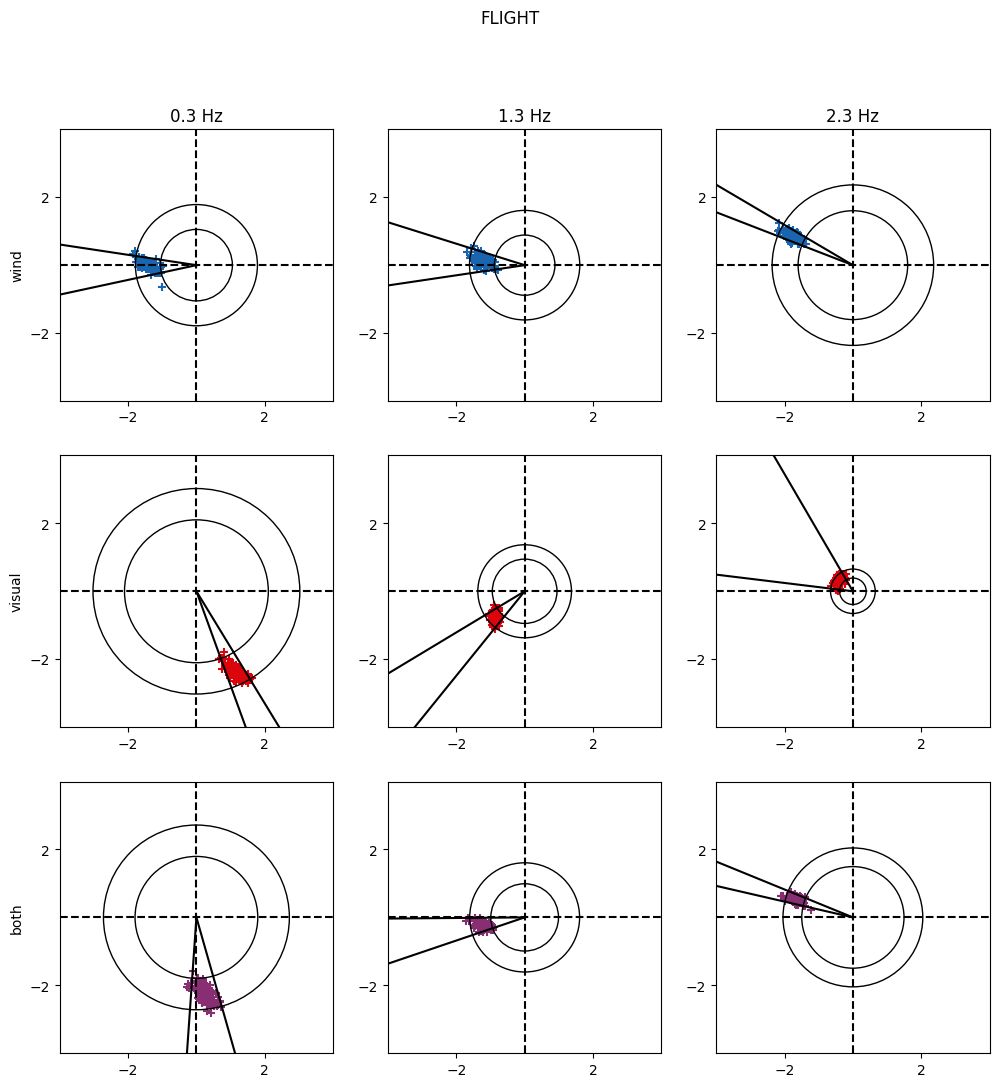

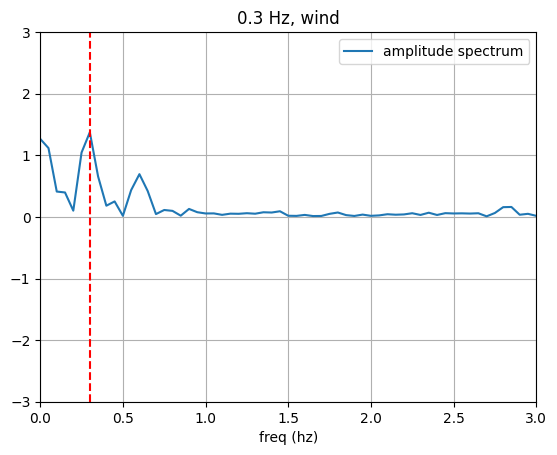

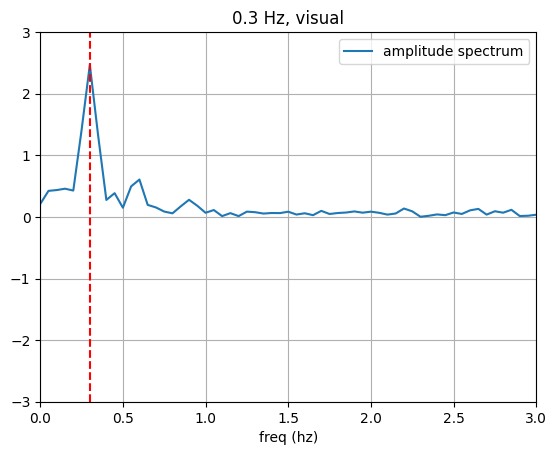

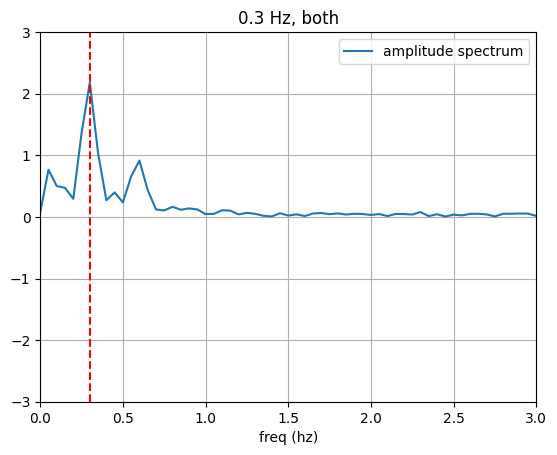

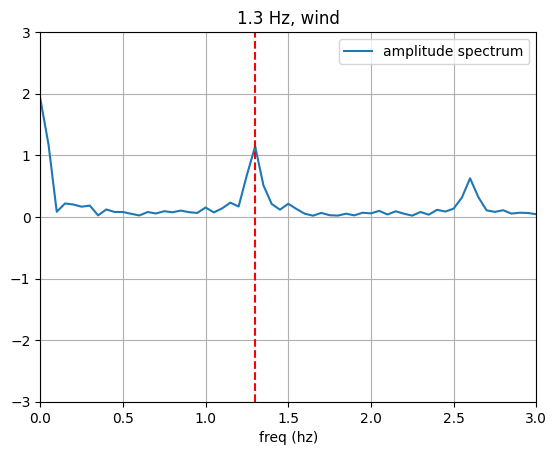

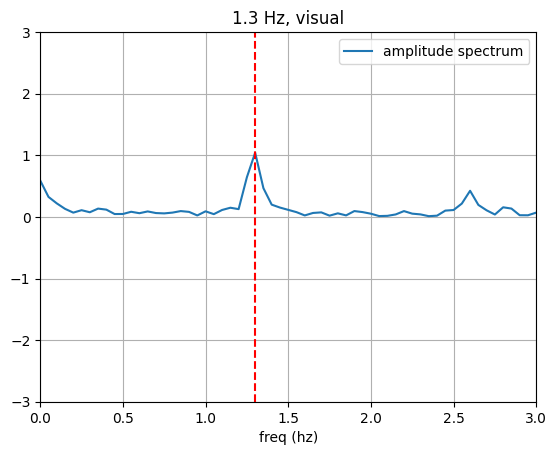

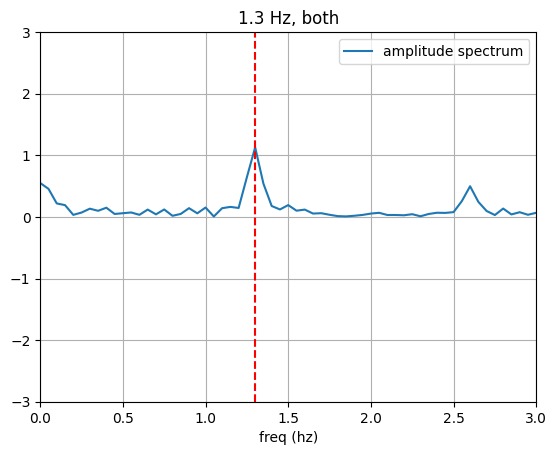

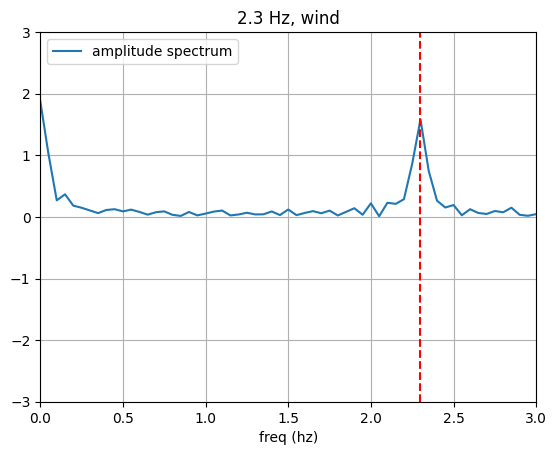

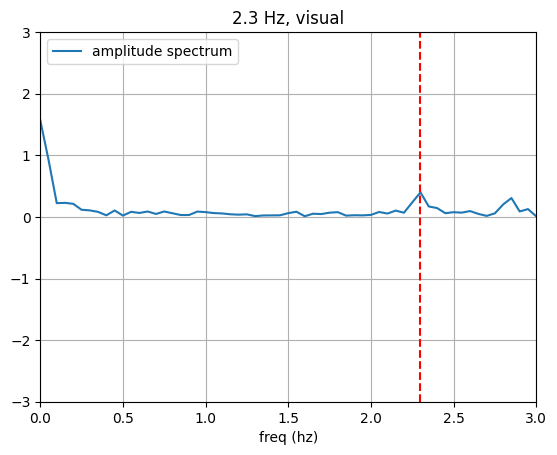

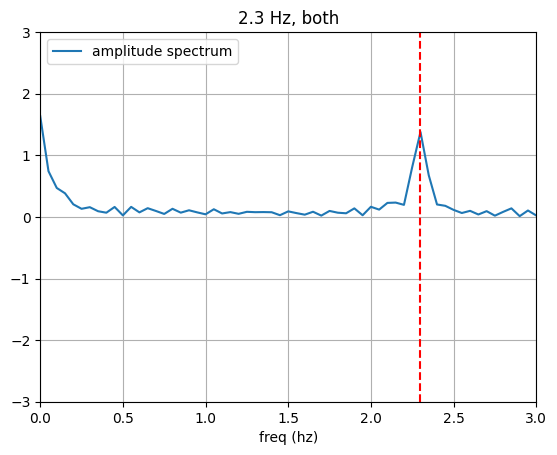

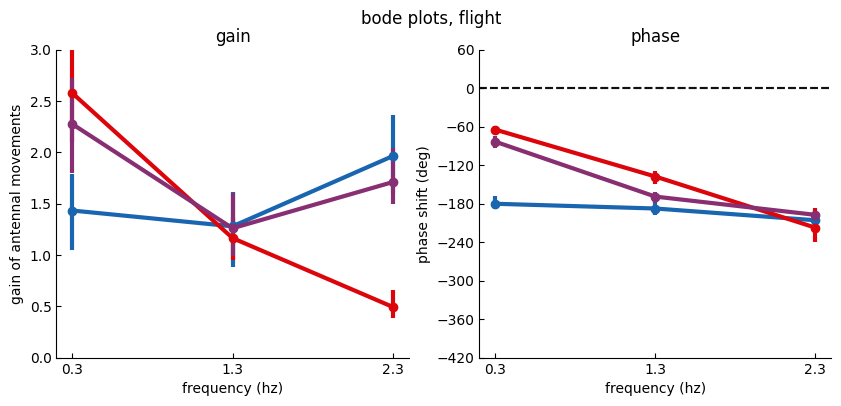

In [61]:
# FLIGHT
Fs = 20000

freqs = [0.3,1.3, 2.3]

freqs = [0.3,1.3, 2.3]
purp9 = np.array([136,46,114])/255
blue10 = np.array([25,101,176])/255
red26 = np.array([220,5,12])/255
palette = [blue10,red26,purp9]

data = {}
spio.loadmat('visualShiftInfo',mdict=data)
freq_list = np.squeeze(data['freq'])
phases = np.squeeze(data['phaseLagInRads'])
freq_list = np.array([freq_list[2], freq_list[6], freq_list[9]])
phases = np.array([phases[2], phases[6],phases[9]])
time = np.arange(0, 12, 1/20000)

frameshift = np.floor(const.fps * (phases/(2*np.pi*freq_list))).astype(np.int64)
sampshift = np.floor(frameshift * (20000/60)).astype(np.int64)
readjusted_theta = (sampshift / const.fs) * (2*np.pi*freq_list)

conditions = ['wind','visual','both']
#f_bounds = [[120,150],[85,130],[110,140]]
#nf_bounds = [[130,160],[115,150],[135,165]]
n = 0
phaseShiftArr = np.zeros((3,3))
phaseShiftArr_ci = np.zeros((2,3,3))
gainArr = np.zeros((3,3))
gainArr_ci = np.zeros((2,3,3))
rng = np.random.default_rng()
num_mc_reps = 100

fig_scatter, ax_scatter = plt.subplots(3,3, figsize=(12,12))
#fig_scatter.tight_layout()
fig_scatter.suptitle('FLIGHT')
ax_scatter[0,0].set_title('0.3 Hz')
ax_scatter[0,1].set_title('1.3 Hz')
ax_scatter[0,2].set_title('2.3 Hz')
ax_scatter[0,0].set_ylabel('wind')
ax_scatter[1,0].set_ylabel('visual')
ax_scatter[2,0].set_ylabel('both')

for i, f in enumerate(freqs):
    orig_theta = phases[i]
    adj_theta = readjusted_theta[i]
    #sinewave = np.sin(2 * np.pi * freq * time - theta)
    flightLegend = ['wind','visual','both']
    noFlightLegend = ['wind','visual','both']
    shift = frameshift[i]
    for k,condition in enumerate(conditions):

        df_flight = df[(df['flight'] == True) & (df['stimulus'] == f) & (df['condition'] == condition)].reset_index()
        df_noFlight = df[(df['noFlight'] == True) & (df['stimulus'] == f) & (df['condition'] == condition)].reset_index()
        
        flightBase_arr = np.array([trial for trial in df_flight['BaseAvg_Flight'].to_list()])
        flightBase = np.nanmean(flightBase_arr,axis=0)[1]
        
        noFlightBase_arr = np.array([trial for trial in df_noFlight['BaseAvg_noFlight'].to_list()])
        noFlightBase = np.nanmean(noFlightBase_arr,axis=0)[1]

        conCountFlight = len(np.array([trial[:,1] for trial in df_flight['iaa'].to_list()]))
        conCountNoFlight = len(np.array([trial[:,1] for trial in df_noFlight['iaa'].to_list()]))

        noFlight_arr = np.array([trial[:,1] for trial in df_noFlight['iaa'].to_list()])
        noFlight = np.nanmean(noFlight_arr,axis=0)

        flight_arr = np.array([trial[:,1] for trial in df_flight['iaa'].to_list()])
        flight = np.nanmean(flight_arr,axis=0)

        flightWave = flight[240+shift:] - flightBase
        noFlightWave = noFlight[240+shift:] - noFlightBase

        
        
        # Sample information
        samprate = 60
        N = samprate * 12
        T = 1.0 / samprate
        # Create a signal
        x = np.linspace(0.0, N*T, N-shift)
        pad = np.zeros((480+shift,1))
        
        # sinewave (stimulus)
        
        sinewave = np.sin(2 * np.pi * f * x - (adj_theta-orig_theta))
        waveInput = np.append(sinewave,pad)
        yInput = np.fft.fft(waveInput)[:N//2]
        freqInput = np.fft.fftfreq(waveInput.size, d=T)[:N//2]
        indexInput, = np.where(np.isclose(freqInput, f, atol=10e-10))
    
        ### main trace 
        
        signalFlight = np.append(flightWave,pad)
        ySig = np.fft.fft(signalFlight)[:N//2]
        freqSig = np.fft.fftfreq(signalFlight.size, d=T)[:N//2]
        indexSig, = np.where(np.isclose(freqSig, f, atol=10e-10))

        H = ySig[indexSig[0]] / yInput[indexInput[0]]
        gain = np.abs(H)  # Gain is the magnitude
        phase = np.angle(H)  # Phase in radians
        if phase > 0:
            phase_adj = phase - (2 * np.pi)
        else:
            phase_adj = phase
        
        ### error bars
        
        num_mc_samps = df_flight['index'].count()
        print(num_mc_samps)
        montecarlo = rng.integers(low=0,high=num_mc_samps,size=(num_mc_reps,num_mc_samps))

        mc_altered_traces = [np.nanmean(np.array([flight_arr[col,:] for col in row]),axis=0) for row in montecarlo]
        corr_mc_altered_traces = [trace[240+shift:] - np.nanmean(trace[0:240]) for trace in mc_altered_traces]
        
        padded_mc_altered_traces = [np.append(trace,pad) for trace in corr_mc_altered_traces]
        ySigs = [np.fft.fft(trace)[:N//2] for trace in padded_mc_altered_traces]
        freqSigs = [np.fft.fftfreq(trace.size, d=T)[:N//2] for trace in padded_mc_altered_traces]
        
        H_all = [ySig[indexSig[0]] / yInput[indexSig[0]] for ySig in ySigs]

        real = [number.real for number in H_all]
        imag = [number.imag for number in H_all]
        
        ax_scatter[k,i].scatter(real, imag, color=palette[k], marker ='+')
        ax_scatter[k,i].axvline(0, c='k',ls='--')
        ax_scatter[k,i].axhline(0, c='k',ls='--')
        ax_scatter[k,i].set_ylim([-4,4])
        ax_scatter[k,i].set_yticks([-2,2])
        ax_scatter[k,i].set_xticks([-2,2])
        ax_scatter[k,i].set_xlim([-4,4])

        gain_mc = np.array([np.abs(H) for H in H_all])
        gain_lower = np.percentile(gain_mc, 2.5)
        gain_upper = np.percentile(gain_mc, 97.5)
        
        phase_mc = np.array([np.angle(H) for H in H_all])
        wrapped = (phase_mc + 2 * np.pi) % (2 * np.pi)
        wrapped.sort()

        central_fraction = 0.95
        
        ndx = len(wrapped)

        min_width = 2 * np.pi
        min_start = 0
        for idx in range(num_mc_reps):
            jdx = (idx + 95) % num_mc_reps
            width = (wrapped[jdx] - wrapped[idx]) % (2 * np.pi)
            if width < min_width:
                min_width = width
                min_start = idx

        lower = wrapped[min_start]
        upper = (lower + min_width) % (2 * np.pi)
        
        lower_plot = 10 * np.exp(1j * np.array(lower))
        upper_plot = 10 * np.exp(1j * np.array(upper))

        ax_scatter[k,i].plot([0, lower_plot.real] ,[0,lower_plot.imag],c='k')
        ax_scatter[k,i].plot([0, upper_plot.real] ,[0,upper_plot.imag],c='k')

        
        lower_circle = plt.Circle((0, 0j), gain_lower, fill=False, color='k')
        ax_scatter[k,i].add_artist(lower_circle)
        upper_circle = plt.Circle((0, 0j), gain_upper, fill=False, color='k')
        ax_scatter[k,i].add_artist(upper_circle)
        
        rel_lower = (phase - lower + np.pi) % (2 * np.pi) - np.pi
        rel_upper = (upper - phase + np.pi) % (2 * np.pi) - np.pi
        phase_range = [rel_lower,rel_upper]
        
        """
        gain_mc = [np.abs(H) for H in H_all]  # Gain is the magnitude
        phase_mc = np.array([np.angle(H) for H in H_all])  # Phase in rads
        phase_mc[phase_mc > 0] -= np.pi*2
            
        phase_ci = (stats.sem(phase_mc) * 1.96)
        gain_ci = (stats.sem(gain_mc) * 1.96)
        """

        print("Condition:", condition, "Freq:", f,"Gain:", gain, ", phase shift:", phase)

        phaseShiftArr[i,k] = np.rad2deg(phase_adj)
        phaseShiftArr_ci[:,i,k] = np.rad2deg(phase_range)
        gainArr[i,k] = gain
        gainArr_ci[:,i,k] = [gain - gain_lower, gain_upper - gain]
        
        print(gainArr_ci)
        # Plot a spectrum
        fig,ax = plt.subplots()
        ax.plot(freqSig, (2/N * np.abs(ySig)), label='amplitude spectrum')   # in a conventional form
        #ax.plot(freqInput[0:N//2], np.angle(yInput[0:N//2]), label='phase spectrum')
        ax.axvline(freqSig[indexSig[0]],ls='--',c='r')
        ax.legend()
        ax.set_xlim([0,3])
        ax.set_ylim([-3,3])
        ax.grid()
        ax.set_xlabel('freq (hz)')
        ax.set_title(str(f)+' Hz, '+condition)
        fig.savefig(str(f)+'_'+condition+'_fft.png')

fig_scatter.savefig('flight_scatter.png')

conditionList = ['wind','visual','both']
flightLegend = ['wind','_','visual','_','both']
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
freqs = [0.3,1.3,2.3]
for k in range(3):
    ax1.errorbar(freqs,gainArr[:,k],yerr=gainArr_ci[:,:,k],fmt='-o',linewidth=3,color=palette[k])
    ax1.set_title('gain')
    ax1.set_ylim([0,3])
    ax1.set_xticks([0.3,1.3,2.3])
    ax1.set_xlim([.2,2.4])
    ax1.spines[['right', 'top']].set_visible(False)
    ax1.legend()
    ax1.get_legend().remove()
    ax1.set_xlabel('frequency (hz)')
    ax1.set_ylabel('gain of antennal movements')
    ax1.tick_params(direction="in")
    print(conditionList[k])
    print('--------------------')
    print('gain 95% ci across frequencies:')
    print(gainArr_ci[:,:,k])
    print('phase shift (deg) 95% ci across frequencies:')
    print(phaseShiftArr_ci[:,:,k])
    ax2.errorbar(freqs,phaseShiftArr[:,k],yerr=phaseShiftArr_ci[:,:,k],fmt='-o',linewidth=3,color=palette[k])
    ax2.set_title('phase')
    ax2.set_ylabel('phase shift (deg)')
    ax2.set_ylim([-420,60])
    ax2.set_yticks([-420, -360,-300,-240,-180,-120,-60,0, 60])
    ax2.spines[['right', 'top']].set_visible(False)
    ax2.tick_params(direction="in")
    ax2.set_xticks([0.3,1.3,2.3])
    ax2.set_xlim([.2,2.4])
    ax2.axhline(0,c='k',ls='--',alpha=0.6)
    ax2.set_xlabel('frequency (hz)')
    fig.suptitle('bode plots, flight')
    fig.savefig('bode_flight.pdf')
    fig.savefig('bode_flight.png')

## Fig 6G & 6H

64
Condition: wind Freq: 0.3 Gain: 1.894335804140416 , phase shift: -0.24597228258229661
88
Condition: visual Freq: 0.3 Gain: 0.16485226360192384 , phase shift: 0.14547053264633547
65
Condition: both Freq: 0.3 Gain: 1.7664805451549088 , phase shift: -0.1894919691703548
64
Condition: wind Freq: 1.3 Gain: 1.9617411444121406 , phase shift: -0.4463700179399285
88
Condition: visual Freq: 1.3 Gain: 0.2582572044487947 , phase shift: -2.8032637868347217
74
Condition: both Freq: 1.3 Gain: 1.6430773401150585 , phase shift: -0.5156805126345124
72
Condition: wind Freq: 2.3 Gain: 0.7114233646088362 , phase shift: -0.9100453958921794
78
Condition: visual Freq: 2.3 Gain: 0.06586390862726434 , phase shift: 1.9836961538421298
75
Condition: both Freq: 2.3 Gain: 0.6813633771460448 , phase shift: -0.751861094689021


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


wind
--------------------
gain 95% ci across frequencies:
[[0.21725073 0.22263261 0.09114746]
 [0.23318174 0.29114836 0.07992601]]
phase shift (deg) 95% ci across frequencies:
[[4.23243823 3.0739631  3.45137776]
 [3.19838596 3.96919118 3.04244968]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


visual
--------------------
gain 95% ci across frequencies:
[[0.10685517 0.10223938 0.01957949]
 [0.23783962 0.12249181 0.03038071]]
phase shift (deg) 95% ci across frequencies:
[[55.29563975 47.71971669 37.73560329]
 [95.31737237 17.87818508 31.91446671]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


both
--------------------
gain 95% ci across frequencies:
[[0.26729439 0.3450679  0.07774395]
 [0.31500267 0.24660519 0.10009336]]
phase shift (deg) 95% ci across frequencies:
[[14.07812372  8.85511663  3.54553457]
 [12.5096233  10.22788195  4.88459565]]


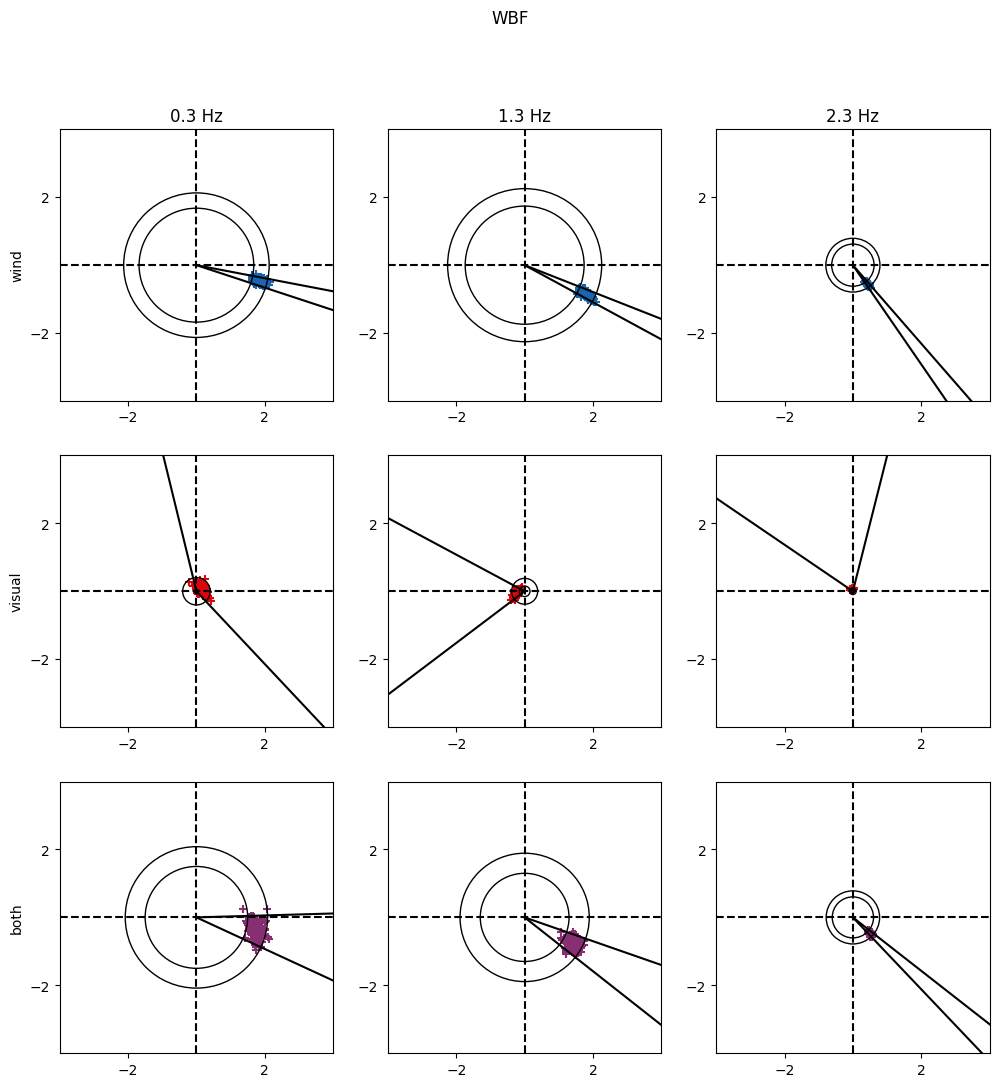

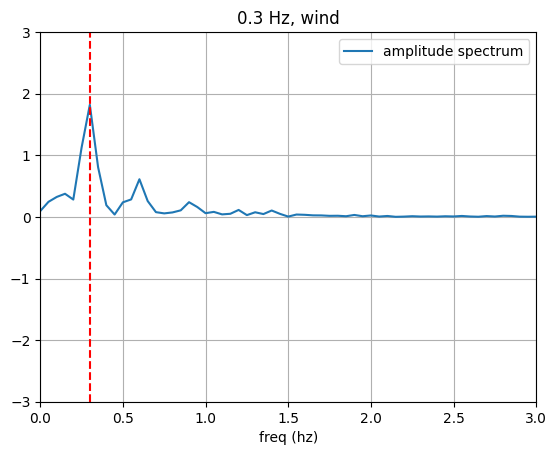

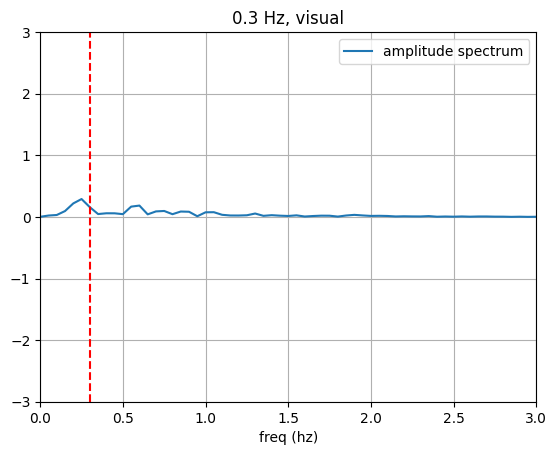

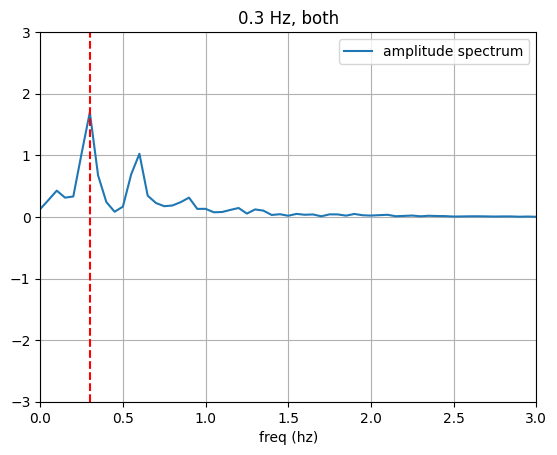

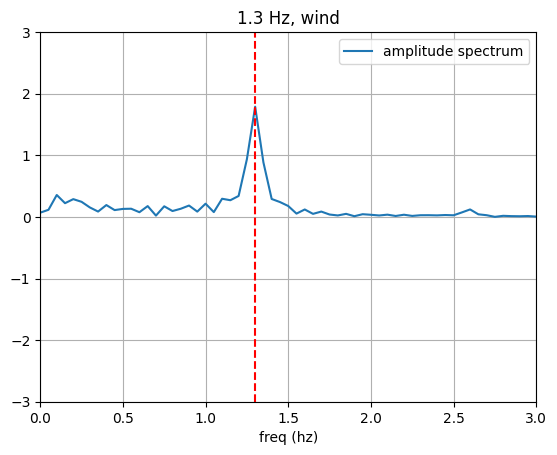

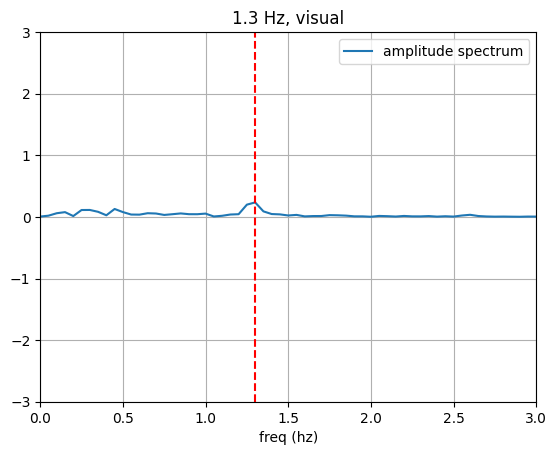

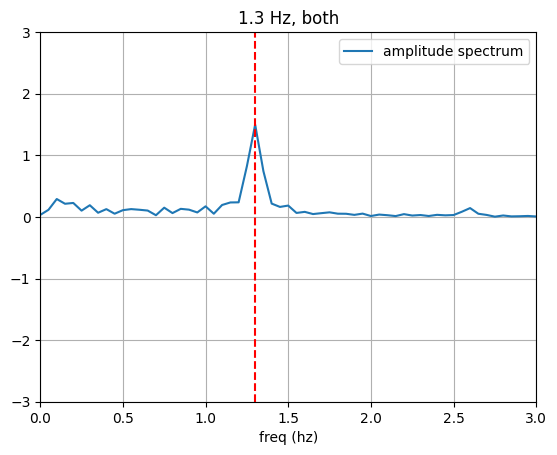

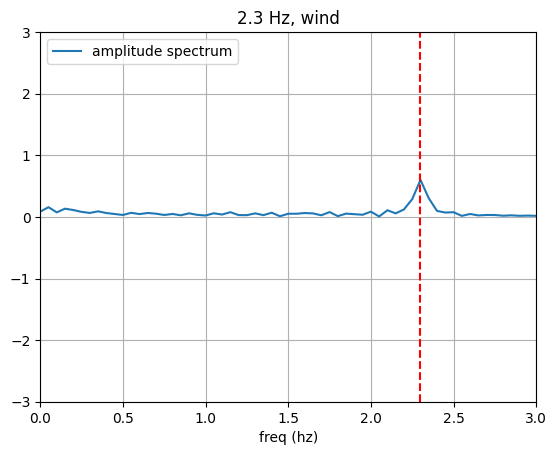

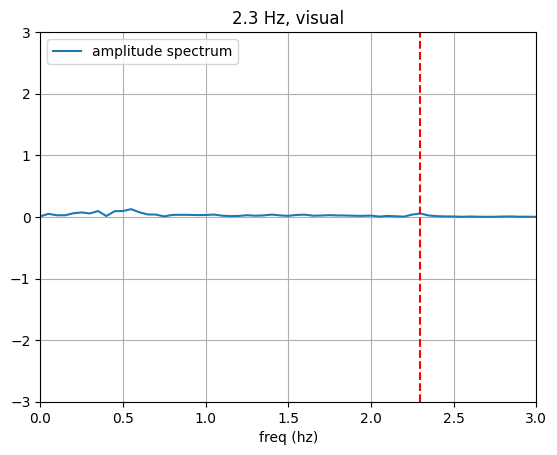

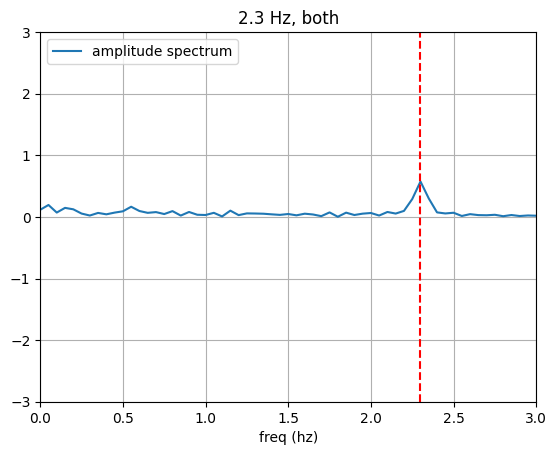

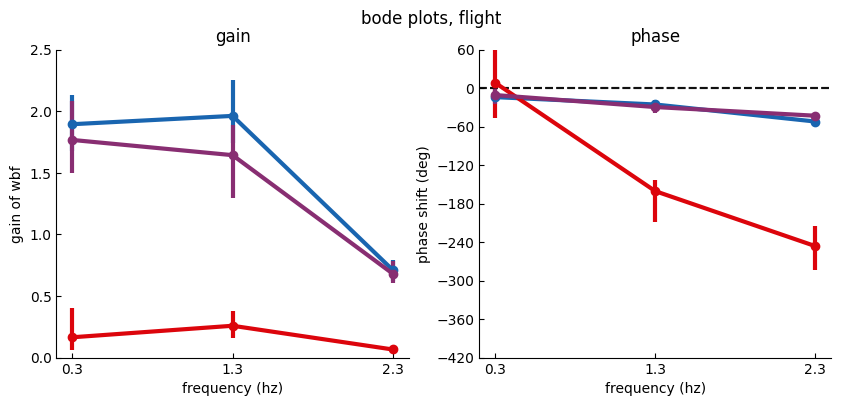

In [63]:
# WBF
Fs = 20000

freqs = [0.3,1.3, 2.3]

freqs = [0.3,1.3, 2.3]
purp9 = np.array([136,46,114])/255
blue10 = np.array([25,101,176])/255
red26 = np.array([220,5,12])/255
palette = [blue10,red26,purp9]

data = {}
spio.loadmat('visualShiftInfo',mdict=data)
freq_list = np.squeeze(data['freq'])
phases = np.squeeze(data['phaseLagInRads'])
freq_list = np.array([freq_list[2], freq_list[6], freq_list[9]])
phases = np.array([phases[2], phases[6],phases[9]])
time = np.arange(0, 12, 1/20000)

frameshift = np.floor(const.fps * (phases/(2*np.pi*freq_list))).astype(np.int64)
sampshift = np.floor(frameshift * (20000/60)).astype(np.int64)
readjusted_theta = (sampshift / const.fs) * (2*np.pi*freq_list)

conditions = ['wind','visual','both']
n = 0
phaseShiftArr = np.zeros((3,3))
phaseShiftArr_ci = np.zeros((2,3,3))
gainArr = np.zeros((3,3))
gainArr_ci = np.zeros((2,3,3))
rng = np.random.default_rng()
num_mc_reps = 100

fig_scatter, ax_scatter = plt.subplots(3,3, figsize=(12,12))
#fig_scatter.tight_layout()
fig_scatter.suptitle('WBF')
ax_scatter[0,0].set_title('0.3 Hz')
ax_scatter[0,1].set_title('1.3 Hz')
ax_scatter[0,2].set_title('2.3 Hz')
ax_scatter[0,0].set_ylabel('wind')
ax_scatter[1,0].set_ylabel('visual')
ax_scatter[2,0].set_ylabel('both')

for i, f in enumerate(freqs):
    orig_theta = phases[i]
    adj_theta = readjusted_theta[i]
    #sinewave = np.sin(2 * np.pi * freq * time - theta)
    flightLegend = ['wind','visual','both']
    noFlightLegend = ['wind','visual','both']
    shift = sampshift[i]
    for k,condition in enumerate(conditions):

        df_flight = df[(df['flight'] == True) & (df['stimulus'] == f) & (df['condition'] == condition)].reset_index()
        wbf_arr = np.array([trial for trial in df_flight['wbf'].to_list()])
        flight = np.nanmean(wbf_arr,axis=0)
        
        conCountFlight = len(np.array([trial for trial in df_flight['wbf'].to_list()]))
         
        # Sample information
        samprate = 20000
        N = samprate * 12
        T = 1.0 / samprate
        # Create a signal
        x = np.linspace(0.0, N*T, N-shift)
        pad = np.zeros((160000+shift,1))
        
        # sinewave (stimulus)
        
        sinewave = np.sin(2 * np.pi * f * x - (adj_theta-orig_theta))
        waveInput = np.append(sinewave,pad)
        yInput = np.fft.fft(waveInput)[:N//2]
        freqInput = np.fft.fftfreq(waveInput.size, d=T)[:N//2]
        indexInput, = np.where(np.isclose(freqInput, f, atol=10e-10))
    
        ### main trace 
        
        b,a = butter(2, 0.1, btype='high',fs=20000)
        filteredWave = filtfilt(b,a,flight[80000+shift:])
        signalFlight = np.append(filteredWave,pad)
        ySig = np.fft.fft(signalFlight)[:N//2]
        freqSig = np.fft.fftfreq(signalFlight.size, d=T)[:N//2]
        indexSig, = np.where(np.isclose(freqSig, f, atol=10e-10))

        H = ySig[indexSig[0]] / yInput[indexInput[0]]
        gain = np.abs(H)  # Gain is the magnitude
        phase = np.angle(H)  # Phase in radians
        if phase > 0:
            phase_adj = phase - (2 * np.pi)
        else:
            phase_adj = phase
        
        ### error bars
        
        num_mc_samps = df_flight['index'].count()
        print(num_mc_samps)
        montecarlo = rng.integers(low=0,high=num_mc_samps,size=(num_mc_reps,num_mc_samps))

        mc_altered_traces = [np.nanmean(np.array([wbf_arr[col,:] for col in row]),axis=0) for row in montecarlo]
        corr_mc_altered_traces = [filtfilt(b,a,trace[80000+shift:]) for trace in mc_altered_traces]
        
        padded_mc_altered_traces = [np.append(trace,pad) for trace in corr_mc_altered_traces]
        ySigs = [np.fft.fft(trace)[:N//2] for trace in padded_mc_altered_traces]
        freqSigs = [np.fft.fftfreq(trace.size, d=T)[:N//2] for trace in padded_mc_altered_traces]
        
        H_all = [ySig[indexSig[0]] / yInput[indexSig[0]] for ySig in ySigs]

        real = [number.real for number in H_all]
        imag = [number.imag for number in H_all]
        
        ax_scatter[k,i].scatter(real, imag, color=palette[k], marker ='+')
        ax_scatter[k,i].axvline(0, c='k',ls='--')
        ax_scatter[k,i].axhline(0, c='k',ls='--')
        ax_scatter[k,i].set_ylim([-4,4])
        ax_scatter[k,i].set_yticks([-2,2])
        ax_scatter[k,i].set_xticks([-2,2])
        ax_scatter[k,i].set_xlim([-4,4])

        gain_mc = np.array([np.abs(H) for H in H_all])
        gain_lower = np.percentile(gain_mc, 2.5)
        gain_upper = np.percentile(gain_mc, 97.5)
        
        phase_mc = np.array([np.angle(H) for H in H_all])
        wrapped = (phase_mc + 2 * np.pi) % (2 * np.pi)
        wrapped.sort()

        central_fraction = 0.95
        
        ndx = len(wrapped)

        min_width = 2 * np.pi
        min_start = 0
        for idx in range(num_mc_reps):
            jdx = (idx + 95) % num_mc_reps
            width = (wrapped[jdx] - wrapped[idx]) % (2 * np.pi)
            if width < min_width:
                min_width = width
                min_start = idx

        lower = wrapped[min_start]
        upper = (lower + min_width) % (2 * np.pi)
        
        lower_plot = 10 * np.exp(1j * np.array(lower))
        upper_plot = 10 * np.exp(1j * np.array(upper))

        ax_scatter[k,i].plot([0, lower_plot.real] ,[0,lower_plot.imag],c='k')
        ax_scatter[k,i].plot([0, upper_plot.real] ,[0,upper_plot.imag],c='k')

        
        lower_circle = plt.Circle((0, 0j), gain_lower, fill=False, color='k')
        ax_scatter[k,i].add_artist(lower_circle)
        upper_circle = plt.Circle((0, 0j), gain_upper, fill=False, color='k')
        ax_scatter[k,i].add_artist(upper_circle)
        
        rel_lower = (phase - lower + np.pi) % (2 * np.pi) - np.pi
        rel_upper = (upper - phase + np.pi) % (2 * np.pi) - np.pi
        phase_range = [rel_lower,rel_upper]
        
        """
        gain_mc = [np.abs(H) for H in H_all]  # Gain is the magnitude
        phase_mc = np.array([np.angle(H) for H in H_all])  # Phase in rads
        phase_mc[phase_mc > 0] -= np.pi*2
            
        phase_ci = (stats.sem(phase_mc) * 1.96)
        gain_ci = (stats.sem(gain_mc) * 1.96)
        """

        print("Condition:", condition, "Freq:", f,"Gain:", gain, ", phase shift:", phase)

        phaseShiftArr[i,k] = np.rad2deg(phase_adj)
        phaseShiftArr_ci[:,i,k] = np.rad2deg(phase_range)
        gainArr[i,k] = gain
        gainArr_ci[:,i,k] = [gain - gain_lower, gain_upper - gain]
          
         # Plot a spectrum
        fig,ax = plt.subplots()
        ax.plot(freqSig, (2/N * np.abs(ySig)), label='amplitude spectrum')   # in a conventional form
        #ax.plot(freqInput[0:N//2], np.angle(yInput[0:N//2]), label='phase spectrum')
        ax.axvline(freqSig[indexSig[0]],ls='--',c='r')
        ax.legend()
        ax.set_xlim([0,3])
        ax.set_ylim([-3,3])
        ax.grid()
        ax.set_xlabel('freq (hz)')
        ax.set_title(str(f)+' Hz, '+condition)
        fig.savefig(str(f)+'_'+condition+'_fft.png')

fig_scatter.savefig('wbf_scatter.png')

phaseShiftArr[0,1] += 360 # correct for phase wrap
conditionList = ['wind','visual','both']
flightLegend = ['wind','_','visual','_','both']
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
freqs = [0.3,1.3,2.3]
for k in range(3):
    ax1.errorbar(freqs,gainArr[:,k],yerr=gainArr_ci[:,:,k],fmt='-o',linewidth=3,color=palette[k])
    ax1.set_title('gain')
    ax1.set_ylim([0,2.5])
    ax1.set_xticks([0.3,1.3,2.3])
    ax1.set_xlim([.2,2.4])
    ax1.spines[['right', 'top']].set_visible(False)
    ax1.legend()
    ax1.get_legend().remove()
    ax1.set_xlabel('frequency (hz)')
    ax1.set_ylabel('gain of wbf')
    ax1.tick_params(direction="in")
    print(conditionList[k])
    print('--------------------')
    print('gain 95% ci across frequencies:')
    print(gainArr_ci[:,:,k])
    print('phase shift (deg) 95% ci across frequencies:')
    print(phaseShiftArr_ci[:,:,k])
    ax2.errorbar(freqs,phaseShiftArr[:,k],yerr=phaseShiftArr_ci[:,:,k],fmt='-o',linewidth=3,color=palette[k])
    ax2.set_title('phase')
    ax2.set_ylabel('phase shift (deg)')
    ax2.set_ylim([-420,60])
    ax2.set_yticks([-420,-360,-300,-240,-180,-120,-60,0,60])
    ax2.spines[['right', 'top']].set_visible(False)
    ax2.tick_params(direction="in")
    ax2.set_xticks([0.3,1.3,2.3])
    ax2.set_xlim([.2,2.4])
    ax2.axhline(0,c='k',ls='--',alpha=0.6)
    ax2.set_xlabel('frequency (hz)')
    fig.suptitle('bode plots, flight')
    fig.savefig('bode_wbf.pdf')
    fig.savefig('bode_wbf.png')

## Fig 6I & 6J

64
Condition: wind Freq: 0.3 Gain: 0.04503409099607306 , phase shift: 2.8538876978185783
88
Condition: visual Freq: 0.3 Gain: 0.0058721460591926395 , phase shift: 0.3361251756376399
65
Condition: both Freq: 0.3 Gain: 0.047170575867801406 , phase shift: 2.6794334897917262
64
Condition: wind Freq: 1.3 Gain: 0.04960295378329897 , phase shift: 2.40264775931689
88
Condition: visual Freq: 1.3 Gain: 0.00557923916396981 , phase shift: -1.1619389934200803
74
Condition: both Freq: 1.3 Gain: 0.04118844386875176 , phase shift: 2.442457508239405
72
Condition: wind Freq: 2.3 Gain: 0.05157175083199059 , phase shift: 2.012862427065925
78
Condition: visual Freq: 2.3 Gain: 0.005784530258577403 , phase shift: -2.4913212132659357
75
Condition: both Freq: 2.3 Gain: 0.04489472143002116 , phase shift: 2.025581833992661


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


wind
--------------------
gain 95% ci across frequencies:
[[0.00633404 0.007501   0.00727829]
 [0.00692417 0.00462829 0.00535035]]
phase shift (deg) 95% ci across frequencies:
[[2.18601174 2.10408322 1.99829732]
 [2.57195228 2.22359173 2.20662235]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


visual
--------------------
gain 95% ci across frequencies:
[[0.00228478 0.00259926 0.00346061]
 [0.0036614  0.0031937  0.00297649]]
phase shift (deg) 95% ci across frequencies:
[[35.43322853 19.91548951 15.80528583]
 [42.10001342 34.12180148 19.70838744]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


both
--------------------
gain 95% ci across frequencies:
[[0.01029846 0.00992948 0.00876199]
 [0.00900967 0.00815511 0.008845  ]]
phase shift (deg) 95% ci across frequencies:
[[4.79506637 5.02919899 3.13654848]
 [5.33611061 2.88751084 2.99085622]]


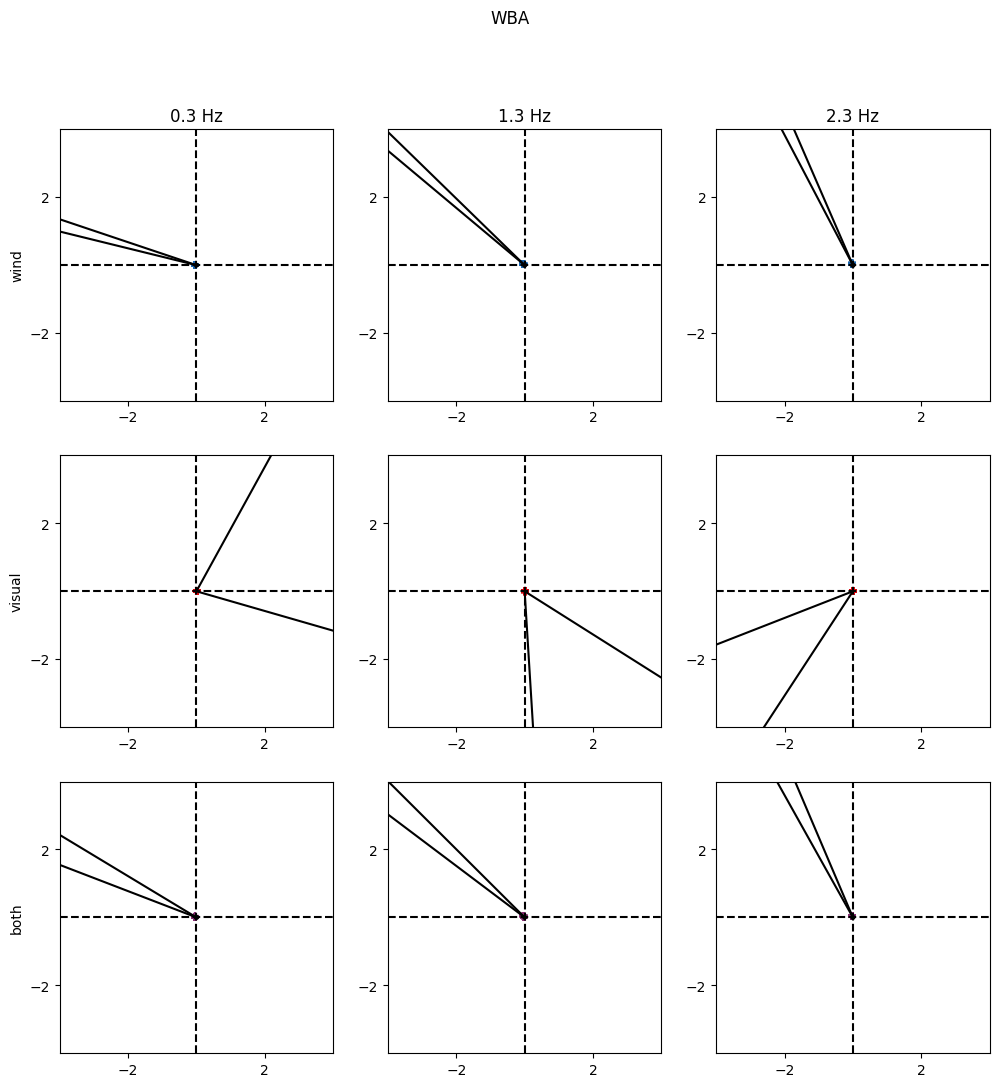

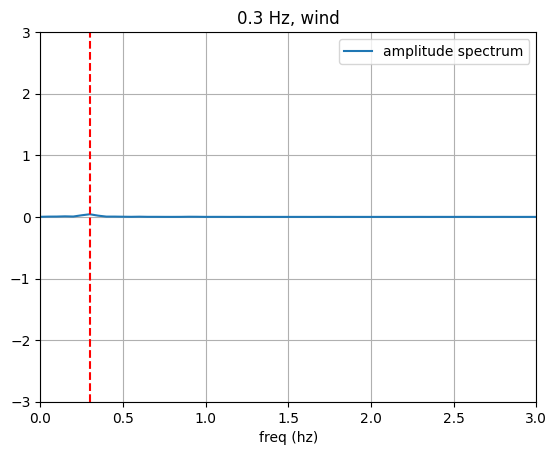

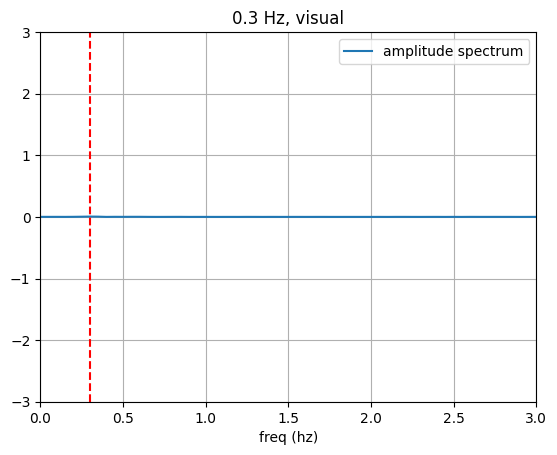

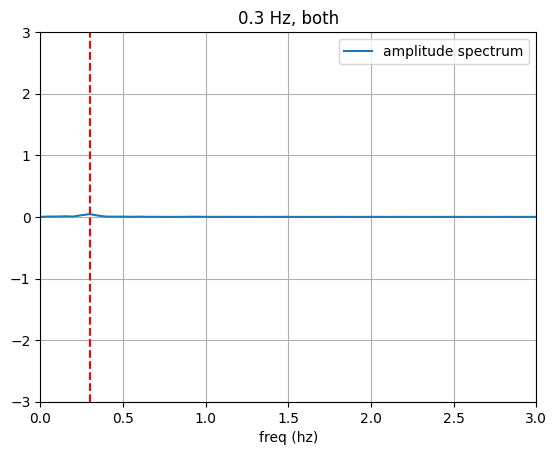

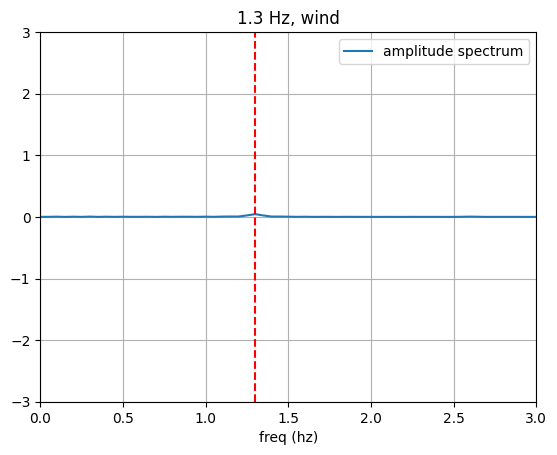

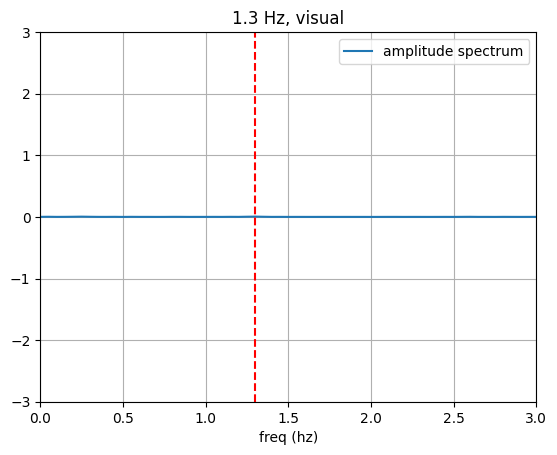

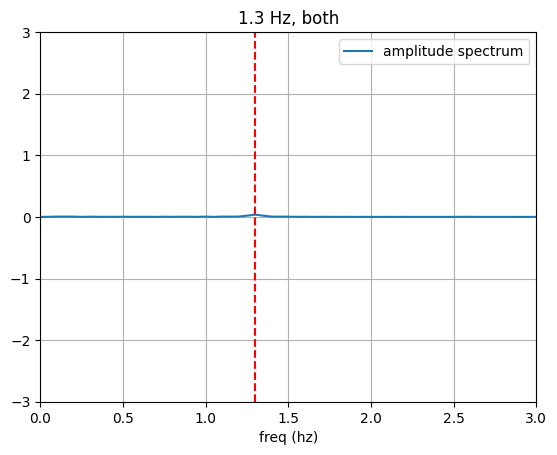

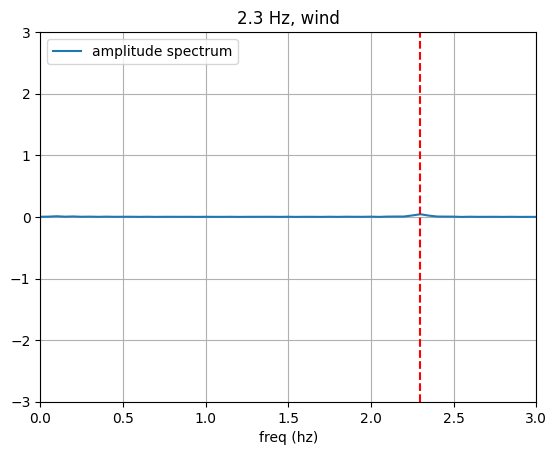

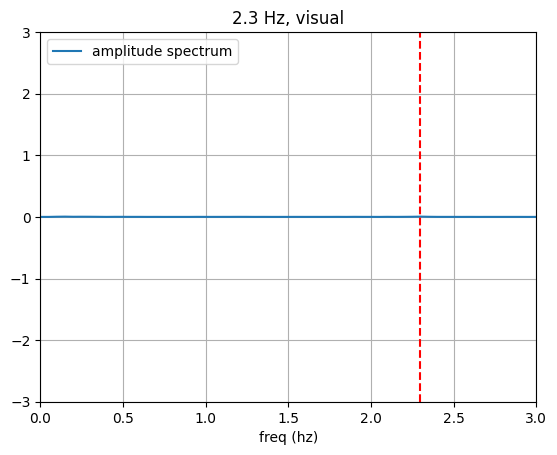

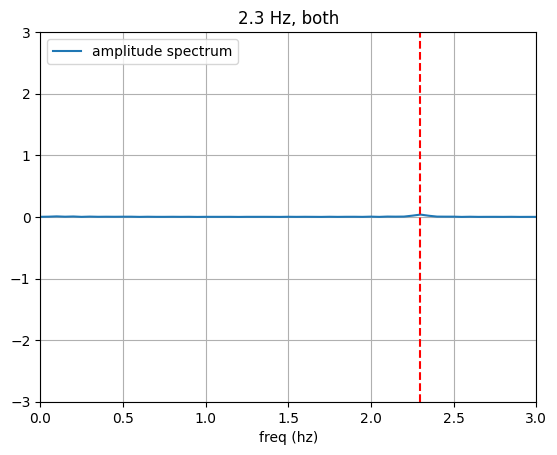

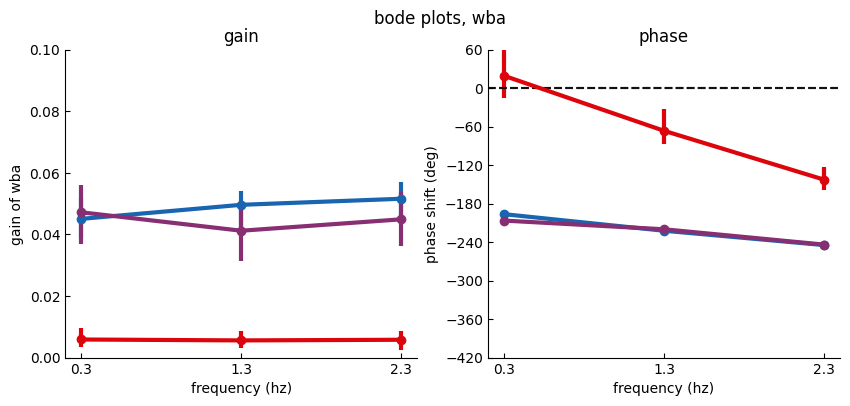

In [64]:
# WBA
Fs = 20000

freqs = [0.3,1.3, 2.3]

freqs = [0.3,1.3, 2.3]
purp9 = np.array([136,46,114])/255
blue10 = np.array([25,101,176])/255
red26 = np.array([220,5,12])/255
palette = [blue10,red26,purp9]

data = {}
spio.loadmat('visualShiftInfo',mdict=data)
freq_list = np.squeeze(data['freq'])
phases = np.squeeze(data['phaseLagInRads'])
freq_list = np.array([freq_list[2], freq_list[6], freq_list[9]])
phases = np.array([phases[2], phases[6],phases[9]])
time = np.arange(0, 12, 1/20000)

frameshift = np.floor(const.fps * (phases/(2*np.pi*freq_list))).astype(np.int64)
sampshift = np.floor(frameshift * (20000/60)).astype(np.int64)
readjusted_theta = (sampshift / const.fs) * (2*np.pi*freq_list)

conditions = ['wind','visual','both']
n = 0
phaseShiftArr = np.zeros((3,3))
phaseShiftArr_ci = np.zeros((2,3,3))
gainArr = np.zeros((3,3))
gainArr_ci = np.zeros((2,3,3))
rng = np.random.default_rng()
num_mc_reps = 100

fig_scatter, ax_scatter = plt.subplots(3,3, figsize=(12,12))
#fig_scatter.tight_layout()
fig_scatter.suptitle('WBA')
ax_scatter[0,0].set_title('0.3 Hz')
ax_scatter[0,1].set_title('1.3 Hz')
ax_scatter[0,2].set_title('2.3 Hz')
ax_scatter[0,0].set_ylabel('wind')
ax_scatter[1,0].set_ylabel('visual')
ax_scatter[2,0].set_ylabel('both')


cutoff = 6
time_minmax = np.arange(0, 12-cutoff, 1/const.fs)
start = const.fs*4
cutoff_frames = cutoff * const.fps
cutoff_daq = cutoff * const.fs

global_max_list = []
global_min_list = []
for j, freq in enumerate(freqs):
    orig_theta = phases[j]
    adj_theta = readjusted_theta[j]
    sinewave = np.sin(2 * np.pi * freq * time_minmax - (adj_theta-orig_theta))
    flightLegend = ['wind','visual','both']
    noFlightLegend = ['wind','visual','both']
    
    for i,condition in enumerate(conditions):
    
        df_flight = df[(df['flight'] == True) & (df['stimulus'] == freq) & (df['condition'] == condition)].reset_index()
        
        mean_trace = np.nanmean(np.array(df_flight['wba'].to_list()),axis=0)[start+sampshift[j]:]
        global_max_list.append(np.nanmax(mean_trace))
        global_min_list.append(np.nanmin(mean_trace))
global_max = np.nanmax(global_max_list)
global_min = np.nanmin(global_min_list)

for i, f in enumerate(freqs):
    orig_theta = phases[i]
    adj_theta = readjusted_theta[i]
    #sinewave = np.sin(2 * np.pi * freq * time - theta)
    flightLegend = ['wind','visual','both']
    noFlightLegend = ['wind','visual','both']
    shift = sampshift[i]
    for k,condition in enumerate(conditions):

        df_flight = df[(df['flight'] == True) & (df['stimulus'] == f) & (df['condition'] == condition)].reset_index()
        #df_flight['wba_norm'] = [1 - ((trial - global_min)/(global_max-global_min)) for trial in df_flight['wba']]
        df_flight['wba_norm'] = [trial * -1 for trial in df_flight['wba']]
        wba_arr = np.array([trial for trial in df_flight['wba_norm'].to_list()])
        flight = np.nanmean(wba_arr,axis=0)
        
        conCountFlight = len(np.array([trial for trial in df_flight['wba'].to_list()]))
         
        # Sample information
        samprate = 20000
        N = samprate * 12
        T = 1.0 / samprate
        # Create a signal
        x = np.linspace(0.0, N*T, N-shift)
        pad = np.zeros((160000+shift,1))
        
        # sinewave (stimulus)
        
        sinewave = np.sin(2 * np.pi * f * x - (adj_theta-orig_theta))
        waveInput = np.append(sinewave,pad)
        yInput = np.fft.fft(waveInput)[:N//2]
        freqInput = np.fft.fftfreq(waveInput.size, d=T)[:N//2]
        indexInput, = np.where(np.isclose(freqInput, f, atol=10e-10))
    
        ### main trace 
        
        b,a = butter(2, 0.1, btype='high',fs=20000)
        filteredWave = filtfilt(b,a,flight[80000+shift:])
        signalFlight = np.append(filteredWave,pad)
        ySig = np.fft.fft(signalFlight)[:N//2]
        freqSig = np.fft.fftfreq(signalFlight.size, d=T)[:N//2]
        indexSig, = np.where(np.isclose(freqSig, f, atol=10e-10))

        H = ySig[indexSig[0]] / yInput[indexInput[0]]
        gain = np.abs(H)  # Gain is the magnitude
        phase = np.angle(H)  # Phase in radians
        if phase > 0:
            phase_adj = phase - (2 * np.pi)
        else:
            phase_adj = phase
        
        ### error bars
        
        num_mc_samps = df_flight['index'].count()
        print(num_mc_samps)
        montecarlo = rng.integers(low=0,high=num_mc_samps,size=(num_mc_reps,num_mc_samps))

        mc_altered_traces = [np.nanmean(np.array([wba_arr[col,:] for col in row]),axis=0) for row in montecarlo]
        corr_mc_altered_traces = [filtfilt(b,a,trace[80000+shift:]) for trace in mc_altered_traces]
        
        padded_mc_altered_traces = [np.append(trace,pad) for trace in corr_mc_altered_traces]
        ySigs = [np.fft.fft(trace)[:N//2] for trace in padded_mc_altered_traces]
        freqSigs = [np.fft.fftfreq(trace.size, d=T)[:N//2] for trace in padded_mc_altered_traces]
        
        H_all = [ySig[indexSig[0]] / yInput[indexSig[0]] for ySig in ySigs]

        real = [number.real for number in H_all]
        imag = [number.imag for number in H_all]
        
        ax_scatter[k,i].scatter(real, imag, color=palette[k], marker ='+')
        ax_scatter[k,i].axvline(0, c='k',ls='--')
        ax_scatter[k,i].axhline(0, c='k',ls='--')
        ax_scatter[k,i].set_ylim([-4,4])
        ax_scatter[k,i].set_yticks([-2,2])
        ax_scatter[k,i].set_xticks([-2,2])
        ax_scatter[k,i].set_xlim([-4,4])

        gain_mc = np.array([np.abs(H) for H in H_all])
        gain_lower = np.percentile(gain_mc, 2.5)
        gain_upper = np.percentile(gain_mc, 97.5)
        
        phase_mc = np.array([np.angle(H) for H in H_all])
        wrapped = (phase_mc + 2 * np.pi) % (2 * np.pi)
        wrapped.sort()

        central_fraction = 0.95
        
        ndx = len(wrapped)

        min_width = 2 * np.pi
        min_start = 0
        for idx in range(num_mc_reps):
            jdx = (idx + 95) % num_mc_reps
            width = (wrapped[jdx] - wrapped[idx]) % (2 * np.pi)
            if width < min_width:
                min_width = width
                min_start = idx

        lower = wrapped[min_start]
        upper = (lower + min_width) % (2 * np.pi)
        
        lower_plot = 10 * np.exp(1j * np.array(lower))
        upper_plot = 10 * np.exp(1j * np.array(upper))

        ax_scatter[k,i].plot([0, lower_plot.real] ,[0,lower_plot.imag],c='k')
        ax_scatter[k,i].plot([0, upper_plot.real] ,[0,upper_plot.imag],c='k')

        
        lower_circle = plt.Circle((0, 0j), gain_lower, fill=False, color='k')
        ax_scatter[k,i].add_artist(lower_circle)
        upper_circle = plt.Circle((0, 0j), gain_upper, fill=False, color='k')
        ax_scatter[k,i].add_artist(upper_circle)
        
        rel_lower = (phase - lower + np.pi) % (2 * np.pi) - np.pi
        rel_upper = (upper - phase + np.pi) % (2 * np.pi) - np.pi
        phase_range = [rel_lower,rel_upper]
        
        """
        gain_mc = [np.abs(H) for H in H_all]  # Gain is the magnitude
        phase_mc = np.array([np.angle(H) for H in H_all])  # Phase in rads
        phase_mc[phase_mc > 0] -= np.pi*2
            
        phase_ci = (stats.sem(phase_mc) * 1.96)
        gain_ci = (stats.sem(gain_mc) * 1.96)
        """

        print("Condition:", condition, "Freq:", f,"Gain:", gain, ", phase shift:", phase)

        phaseShiftArr[i,k] = np.rad2deg(phase_adj)
        phaseShiftArr_ci[:,i,k] = np.rad2deg(phase_range)
        gainArr[i,k] = gain
        gainArr_ci[:,i,k] = [gain - gain_lower, gain_upper - gain]
          
         # Plot a spectrum
        fig,ax = plt.subplots()
        ax.plot(freqSig, (2/N * np.abs(ySig)), label='amplitude spectrum')   # in a conventional form
        #ax.plot(freqInput[0:N//2], np.angle(yInput[0:N//2]), label='phase spectrum')
        ax.axvline(freqSig[indexSig[0]],ls='--',c='r')
        ax.legend()
        ax.set_xlim([0,3])
        ax.set_ylim([-3,3])
        ax.grid()
        ax.set_xlabel('freq (hz)')
        ax.set_title(str(f)+' Hz, '+condition)
        fig.savefig(str(f)+'_'+condition+'_fft.png')

fig_scatter.savefig('wba_scatter.png')

phaseShiftArr[0,1] += 360 # correct for phase wrap
conditionList = ['wind','visual','both']
flightLegend = ['wind','_','visual','_','both']
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
freqs = [0.3,1.3,2.3]
for k in range(3):
    ax1.errorbar(freqs,gainArr[:,k],yerr=gainArr_ci[:,:,k],fmt='-o',linewidth=3,color=palette[k])
    ax1.set_title('gain')
    ax1.set_ylim([0,0.1])
    ax1.set_yticks([0,0.02,0.04,0.06,0.08,0.10])
    ax1.set_xticks([0.3,1.3,2.3])
    ax1.set_xlim([.2,2.4])
    ax1.spines[['right', 'top']].set_visible(False)
    ax1.legend()
    ax1.get_legend().remove()
    ax1.set_xlabel('frequency (hz)')
    ax1.set_ylabel('gain of wba')
    ax1.tick_params(direction="in")
    print(conditionList[k])
    print('--------------------')
    print('gain 95% ci across frequencies:')
    print(gainArr_ci[:,:,k])
    print('phase shift (deg) 95% ci across frequencies:')
    print(phaseShiftArr_ci[:,:,k])
    ax2.errorbar(freqs,phaseShiftArr[:,k],yerr=phaseShiftArr_ci[:,:,k],fmt='-o',linewidth=3,color=palette[k])
    ax2.set_title('phase')
    ax2.set_ylabel('phase shift (deg)')
    ax2.set_ylim([-420,60])
    ax2.set_yticks([-420,-360,-300,-240,-180,-120,-60,0,60])
    ax2.spines[['right', 'top']].set_visible(False)
    ax2.tick_params(direction="in")
    ax2.set_xticks([0.3,1.3,2.3])
    ax2.set_xlim([.2,2.4])
    ax2.axhline(0,c='k',ls='--',alpha=0.6)
    ax2.set_xlabel('frequency (hz)')
    fig.suptitle('bode plots, wba')
    fig.savefig('bode_wba.pdf')
    fig.savefig('bode_wba.png')

## Wingbeat amplitude bode plot, absolute (NOTE: This is unused in manuscript, given flip + normalization procedure)

64
Condition: wind Freq: 0.3 Gain: 0.04503409099607307 , phase shift: -0.2877049557712148
88
Condition: visual Freq: 0.3 Gain: 0.00587214605919264 , phase shift: -2.805467477952153
65
Condition: both Freq: 0.3 Gain: 0.04717057586780141 , phase shift: -0.46215916379806643
64
Condition: wind Freq: 1.3 Gain: 0.04960295378329898 , phase shift: -0.7389448942729038
88
Condition: visual Freq: 1.3 Gain: 0.005579239163969809 , phase shift: -4.303531647009873
74
Condition: both Freq: 1.3 Gain: 0.04118844386875176 , phase shift: -0.6991351453503887
72
Condition: wind Freq: 2.3 Gain: 0.05157175083199059 , phase shift: -1.1287302265238681
78
Condition: visual Freq: 2.3 Gain: 0.005784530258577404 , phase shift: -5.632913866855729
75


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Condition: both Freq: 2.3 Gain: 0.044894721430021156 , phase shift: -1.1160108195971326
wind
--------------------
gain 95% ci across frequencies:
[0.00097044 0.00082967 0.00067969]
phase shift (deg) 95% ci across frequencies:
[0.03734676 0.10298313 0.19586854]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


visual
--------------------
gain 95% ci across frequencies:
[0.00070367 0.00023176 0.00026659]
phase shift (deg) 95% ci across frequencies:
[0.09842589 0.33769788 0.34106799]
both
--------------------
gain 95% ci across frequencies:
[0.00146347 0.00083412 0.0007874 ]
phase shift (deg) 95% ci across frequencies:
[0.08676681 0.21696841 0.29757232]


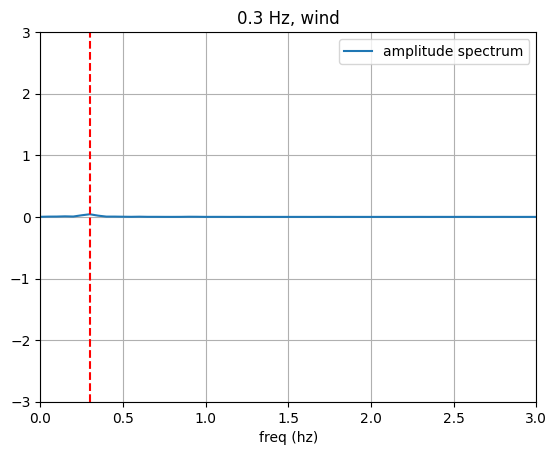

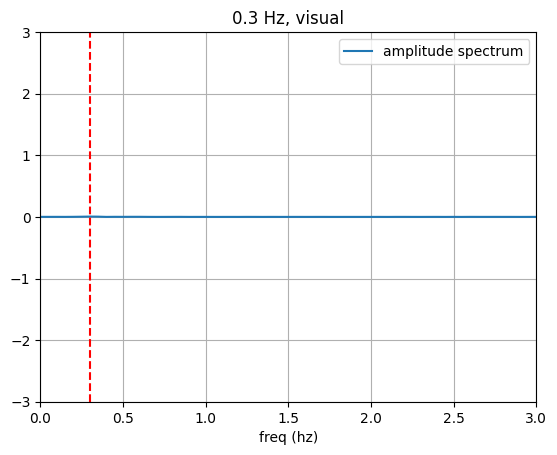

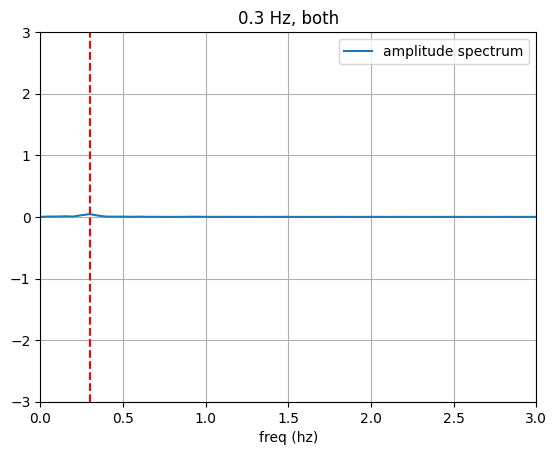

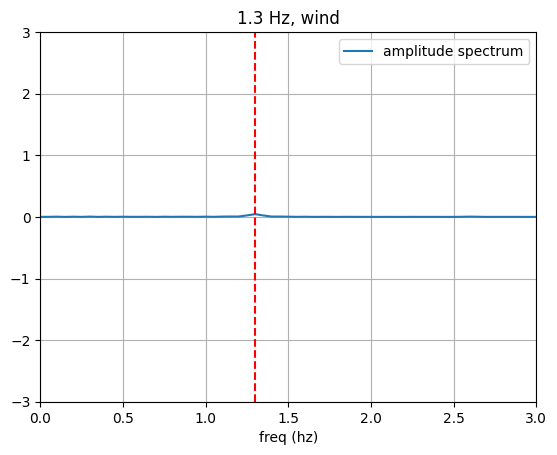

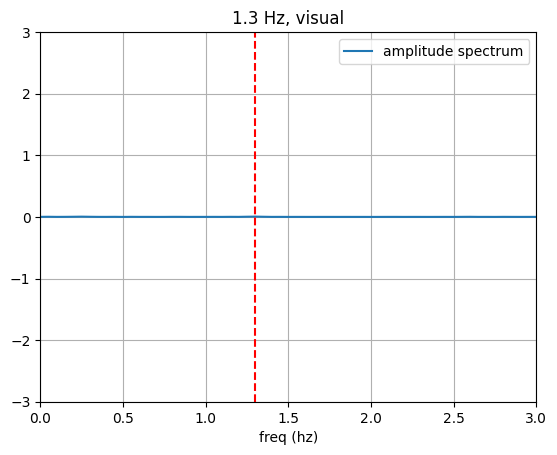

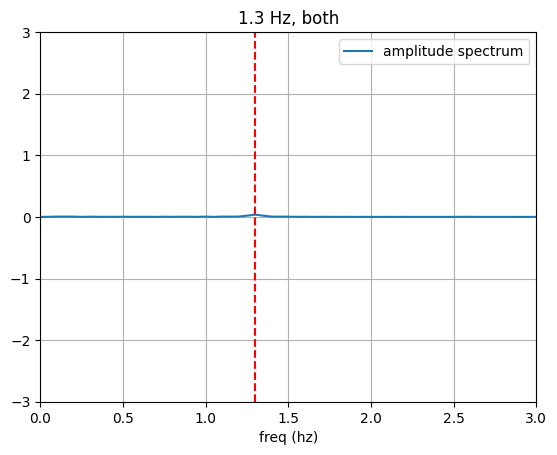

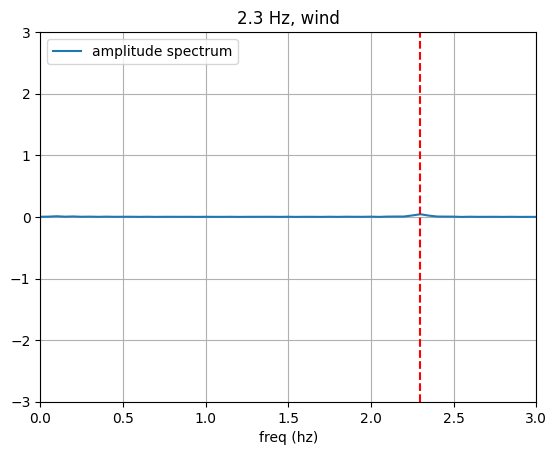

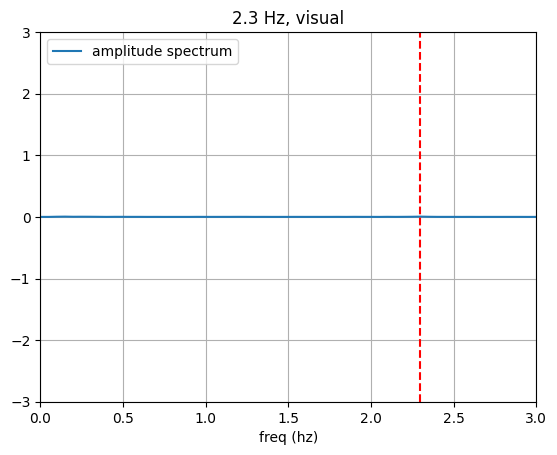

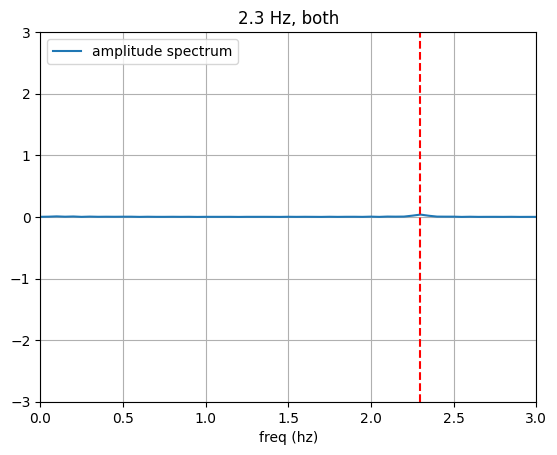

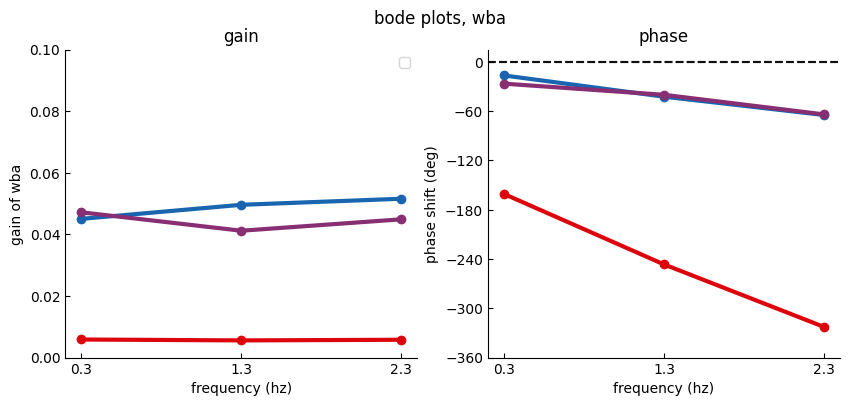

In [9]:
# WBA
Fs = 20000

freqs = [0.3,1.3, 2.3]

freqs = [0.3,1.3, 2.3]
purp9 = np.array([136,46,114])/255
blue10 = np.array([25,101,176])/255
red26 = np.array([220,5,12])/255
palette = [blue10,red26,purp9]

data = {}
spio.loadmat('visualShiftInfo',mdict=data)
freq_list = np.squeeze(data['freq'])
phases = np.squeeze(data['phaseLagInRads'])
freq_list = np.array([freq_list[2], freq_list[6], freq_list[9]])
phases = np.array([phases[2], phases[6],phases[9]])
time = np.arange(0, 12, 1/20000)

frameshift = np.floor(const.fps * (phases/(2*np.pi*freq_list))).astype(np.int64)
sampshift = np.floor(frameshift * (20000/60)).astype(np.int64)
readjusted_theta = (sampshift / const.fs) * (2*np.pi*freq_list)

conditions = ['wind','visual','both']

global_max_list = []
global_min_list = []
for j, freq in enumerate(freqs):
    orig_theta = phases[j]
    adj_theta = readjusted_theta[j]
    sinewave = np.sin(2 * np.pi * freq * time - (adj_theta-orig_theta))
    flightLegend = ['wind','visual','both']
    noFlightLegend = ['wind','visual','both']
    
    for i,condition in enumerate(conditions):
    
        df_flight = df[(df['flight'] == True) & (df['stimulus'] == freq) & (df['condition'] == condition)].reset_index()
        
        mean_trace = np.nanmean(np.array(df_flight['wba'].to_list()),axis=0)[start+sampshift[j]:]
        global_max_list.append(np.nanmax(mean_trace))
        global_min_list.append(np.nanmin(mean_trace))
global_max = np.nanmax(global_max_list)
global_min = np.nanmin(global_min_list)

n = 0
phaseShiftArr = np.zeros((3,3))
phaseShiftArr_ci = np.zeros((3,3))
gainArr = np.zeros((3,3))
gainArr_ci = np.zeros((3,3))
rng = np.random.default_rng()
num_mc_reps = 100
for i, f in enumerate(freqs):
    orig_theta = phases[i]
    adj_theta = readjusted_theta[i]
    #sinewave = np.sin(2 * np.pi * freq * time - theta)
    flightLegend = ['wind','visual','both']
    noFlightLegend = ['wind','visual','both']
    shift = sampshift[i]
    for k,condition in enumerate(conditions):

        df_flight = df[(df['flight'] == True) & (df['stimulus'] == f) & (df['condition'] == condition)].reset_index()
        wba_arr = np.array([trial for trial in df_flight['wba'].to_list()])
        flight = np.nanmean(wba_arr,axis=0)
        
        conCountFlight = len(np.array([trial for trial in df_flight['wba'].to_list()]))
         
        # Sample information
        samprate = 20000
        N = samprate * 12
        T = 1.0 / samprate
        # Create a signal
        x = np.linspace(0.0, N*T, N-shift)
        pad = np.zeros((160000+shift,1))
        
        # sinewave (stimulus)
        
        sinewave = np.sin(2 * np.pi * f * x - (adj_theta-orig_theta))
        waveInput = np.append(sinewave,pad)
        yInput = np.fft.fft(waveInput)
        freqInput = np.fft.fftfreq(waveInput.size, d=T)
        indexInput, = np.where(np.isclose(freqInput, f, atol=10e-10))
    
        magnitudeInput = np.abs(yInput[indexInput[0]])
        phaseInput = np.angle(yInput[indexInput[0]])
        if phaseInput < 0:
            phaseInput += np.pi * 2


        
        ### error bars
        
        num_mc_samps = df_flight['index'].count()
        print(num_mc_samps)
        montecarlo = rng.integers(low=0,high=num_mc_samps,size=(num_mc_reps,num_mc_samps))

        mc_altered_traces = [np.nanmean(np.array([wba_arr[col,:] for col in row]),axis=0) for row in montecarlo]
        corr_mc_altered_traces = [trace[80000+shift:] for trace in mc_altered_traces]
        
        padded_mc_altered_traces = [np.append(trace,pad) for trace in corr_mc_altered_traces]
        ySigs = [np.fft.fft(trace) for trace in padded_mc_altered_traces]
        freqSigs = [np.fft.fftfreq(trace.size, d=T) for trace in padded_mc_altered_traces]
        
        indexSig, = np.where(np.isclose(freqSigs[0], f, atol=10e-10))
        
        phaseSigs = np.array([np.angle(y[indexSig]) for y in ySigs])
        magSigs = np.array([np.abs(y[indexSig]) for y in ySigs])
        gainSigs = (2/N*magSigs)/(2/N*magnitudeInput)
        phaseSigs[phaseSigs<0] += np.pi*2
        phaseSigs = phaseSigs - phaseInput
        
        phaseShift_ci = (stats.sem(phaseSigs) * 1.96)[0]
        gain_ci = (stats.sem(gainSigs) * 1.96)[0]
        

        

        
        ### main trace 
        
        b,a = butter(2, 0.1, btype='high',fs=20000)
        filteredSig = filtfilt(b,a,flight[80000+shift:])
        signalWBA = np.append(filteredSig,pad)
        
        ySig = np.fft.fft(signalWBA)
        freqSig = np.fft.fftfreq(signalWBA.size, d=T)
        indexSig, = np.where(np.isclose(freqSig, f, atol=10e-10))
        # Get magnitude and phase
        magnitudeSig = np.abs(ySig[indexSig[0]])
        phaseSig = np.angle(ySig[indexSig[0]])
        if phaseSig < 0:
            phaseSig += np.pi * 2

        
        

        
        phaseShift = phaseSig - phaseInput
        gain = (2/N*magnitudeSig)/(2/N*magnitudeInput)
        print("Condition:", condition, "Freq:", f,"Gain:", gain, ", phase shift:", phaseShift)

        phaseShiftArr[i,k] = np.rad2deg(phaseShift)
        phaseShiftArr_ci[i,k] = np.rad2deg(phaseShift_ci)
        gainArr[i,k] = gain
        gainArr_ci[i,k] = gain_ci
        
        # Plot a spectrum
        fig,ax = plt.subplots()
        ax.plot(freqSig[0:N//2], 2/N*np.abs(ySig[0:N//2]), label='amplitude spectrum')   # in a conventional form
        #ax.plot(freqInput[0:N//2], np.angle(yInput[0:N//2]), label='phase spectrum')
        ax.axvline(freqSig[indexSig[0]],ls='--',c='r')
        ax.legend()
        ax.set_xlim([0,3])
        ax.set_ylim([-3,3])
        ax.grid()
        ax.set_xlabel('freq (hz)')
        ax.set_title(str(f)+' Hz, '+condition)
        fig.savefig(str(f)+'_'+condition+'_fft.png')

conditionList = ['wind','visual','both']
flightLegend = ['wind','_','visual','_','both']
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
freqs = [0.3,1.3,2.3]
for k in range(3):
    ax1.errorbar(freqs,gainArr[:,k],yerr=gainArr_ci[:,k],fmt='-o',linewidth=3,color=palette[k])
    ax1.set_title('gain')
    ax1.set_ylim([0,0.1])
    ax1.set_yticks([0,0.02,0.04,0.06,0.08,0.1])
    ax1.set_xticks([0.3,1.3,2.3])
    ax1.set_xlim([.2,2.4])
    ax1.spines[['right', 'top']].set_visible(False)
    ax1.legend()
    ax1.set_xlabel('frequency (hz)')
    ax1.set_ylabel('gain of wba')
    ax1.tick_params(direction="in")
    print(conditionList[k])
    print('--------------------')
    print('gain 95% ci across frequencies:')
    print(gainArr_ci[:,k])
    print('phase shift (deg) 95% ci across frequencies:')
    print(phaseShiftArr_ci[:,k])
    ax2.errorbar(freqs,phaseShiftArr[:,k],yerr=phaseShiftArr_ci[:,k],fmt='-o',linewidth=3,color=palette[k])
    ax2.set_title('phase')
    ax2.set_ylabel('phase shift (deg)')
    ax2.set_ylim([-360,15])
    ax2.set_yticks([-360,-300,-240,-180,-120,-60,0])
    ax2.spines[['right', 'top']].set_visible(False)
    ax2.tick_params(direction="in")
    ax2.set_xticks([0.3,1.3,2.3])
    ax2.set_xlim([.2,2.4])
    ax2.axhline(0,c='k',ls='--',alpha=0.6)
    ax2.set_xlabel('frequency (hz)')
    fig.suptitle('bode plots, wba')
    fig.savefig('bode_wba.pdf')
    fig.savefig('bode_wba.png')